In [1]:
import mplhep
import matplotlib.pyplot as plt
import uproot
from scipy import stats
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 64
import pandas as pd
file1 = uproot.open("root://fndca1.fnal.gov:1094/pnfs/fnal.gov/usr/mu2e/scratch/users/ehrlich/sidet/crvreco10/rec.mu2e.CRV_wideband_cosmics.crvaging-008.001619_000.root")
file2 = uproot.open("root://fndca1.fnal.gov:1094/pnfs/fnal.gov/usr/mu2e/scratch/users/ehrlich/sidet/crvreco10/rec.mu2e.CRV_wideband_cosmics.crvaging-008.001421_000.root")

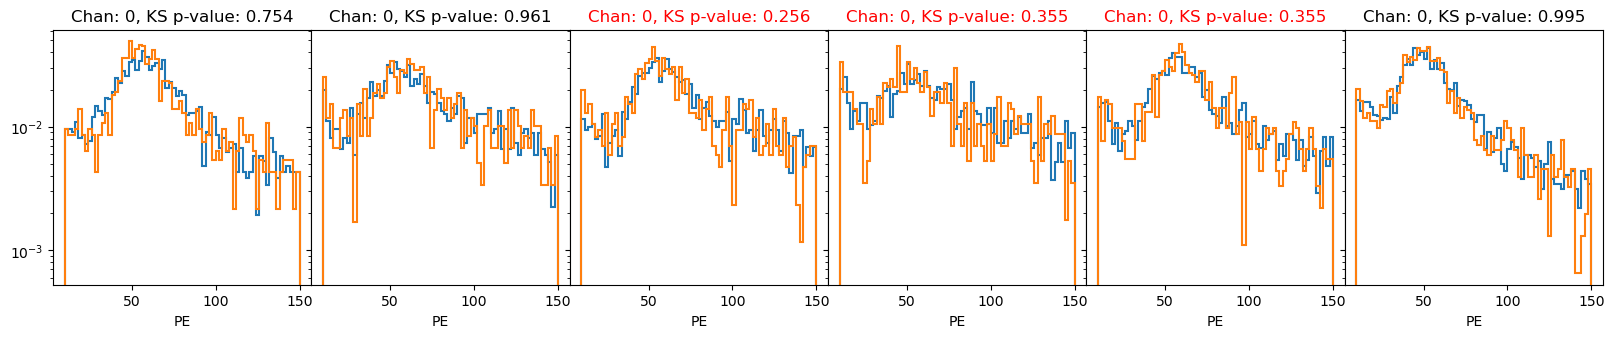

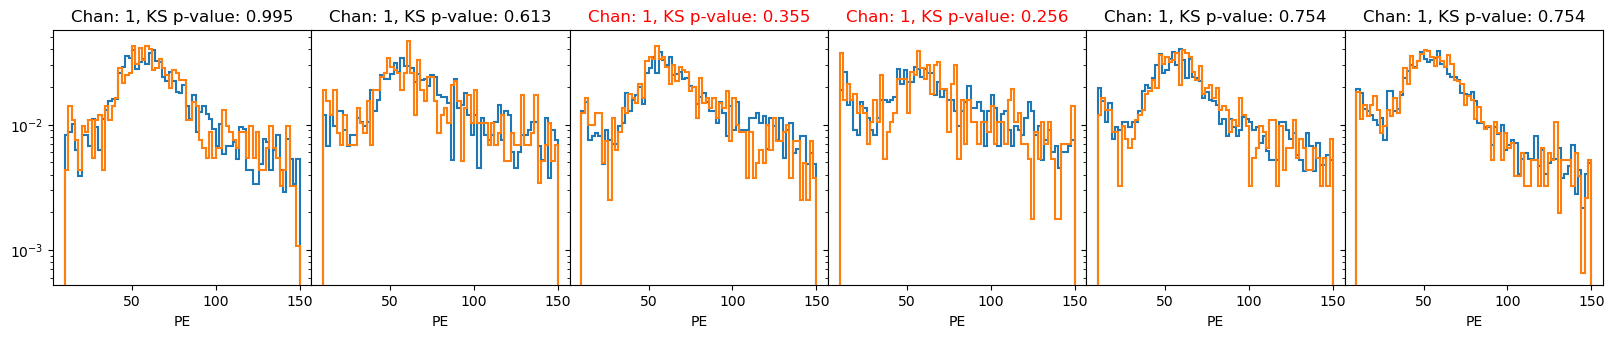

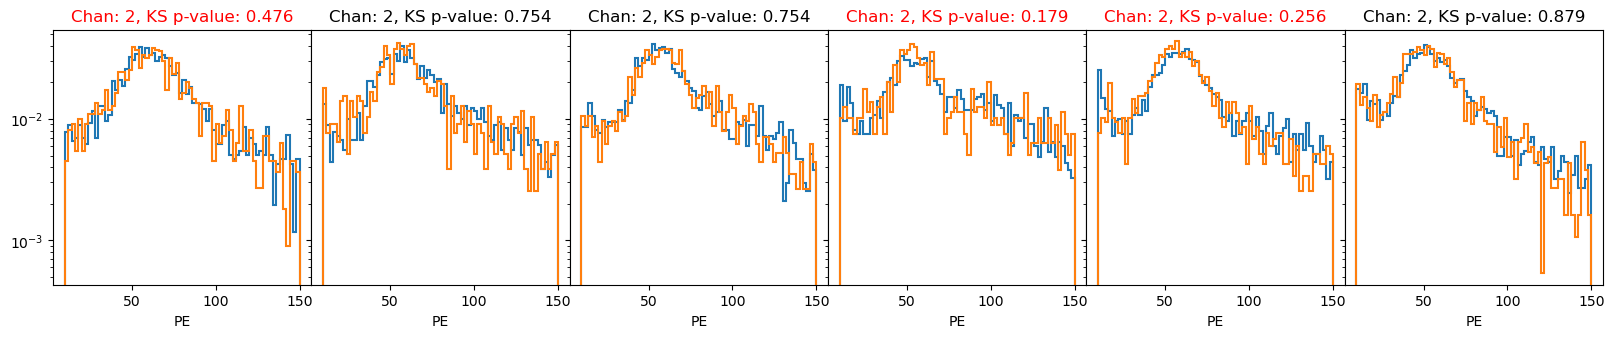

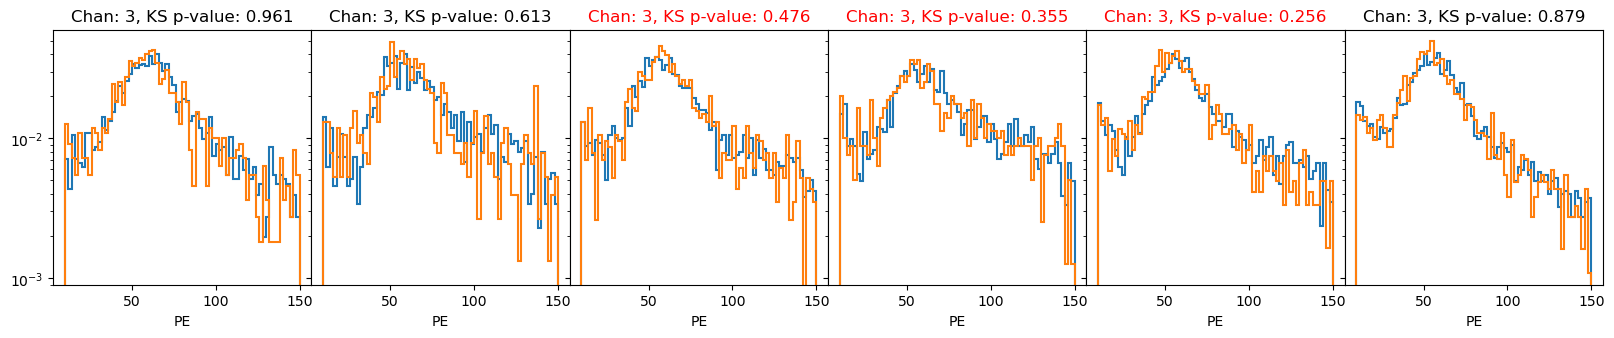

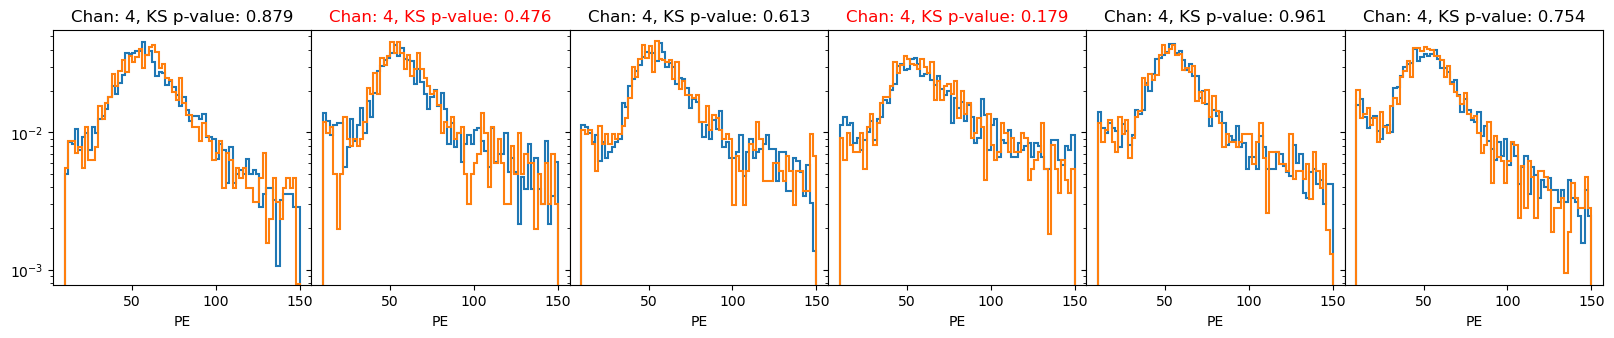

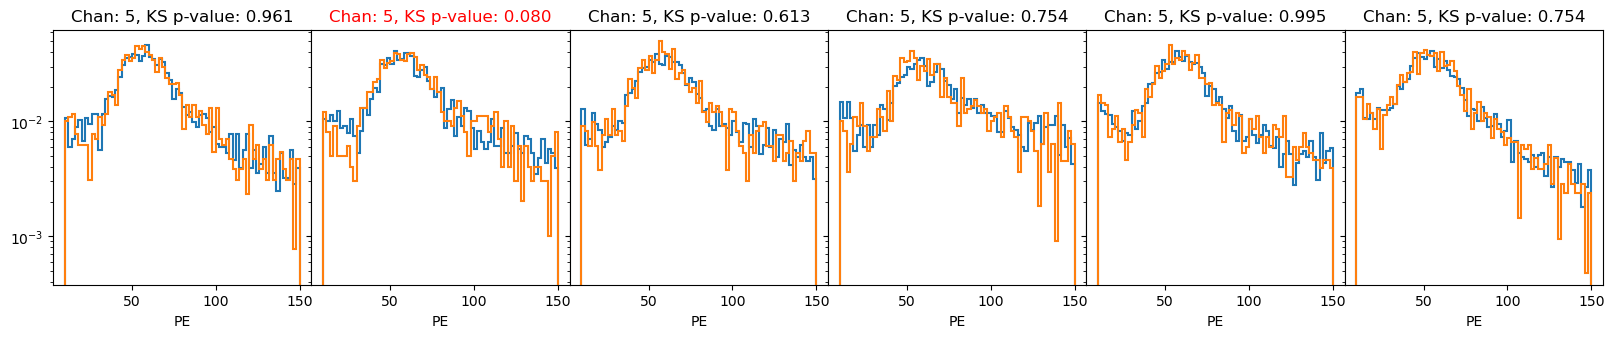

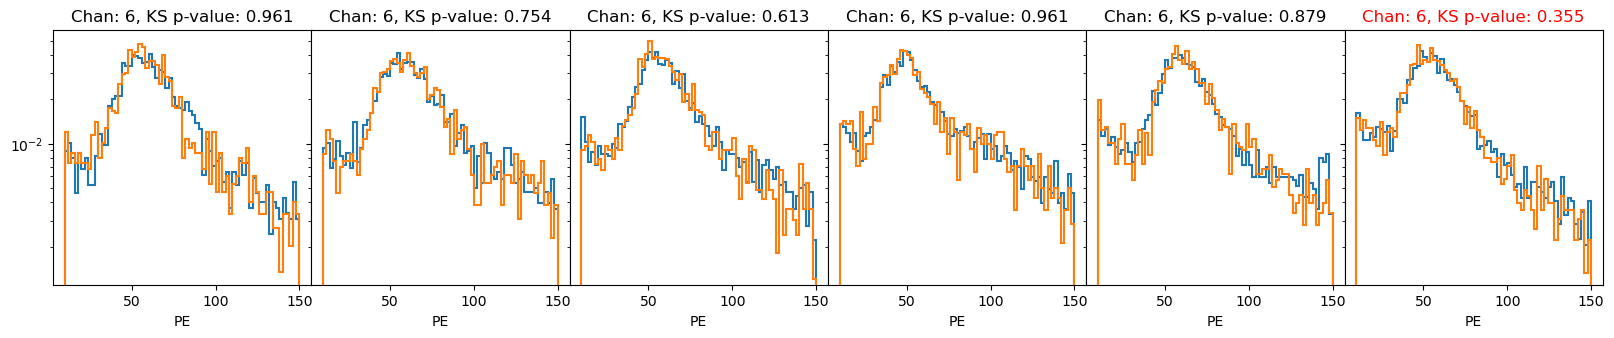

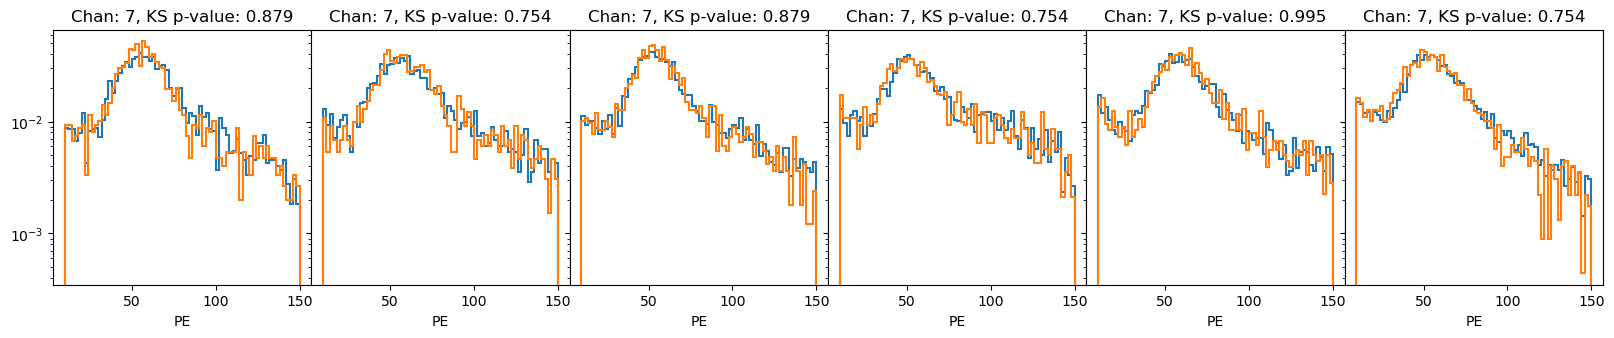

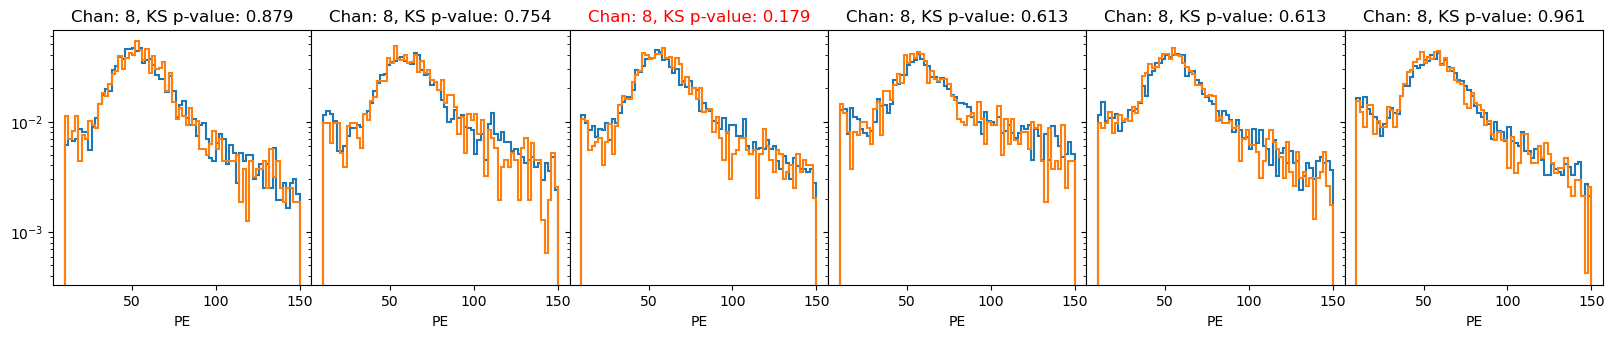

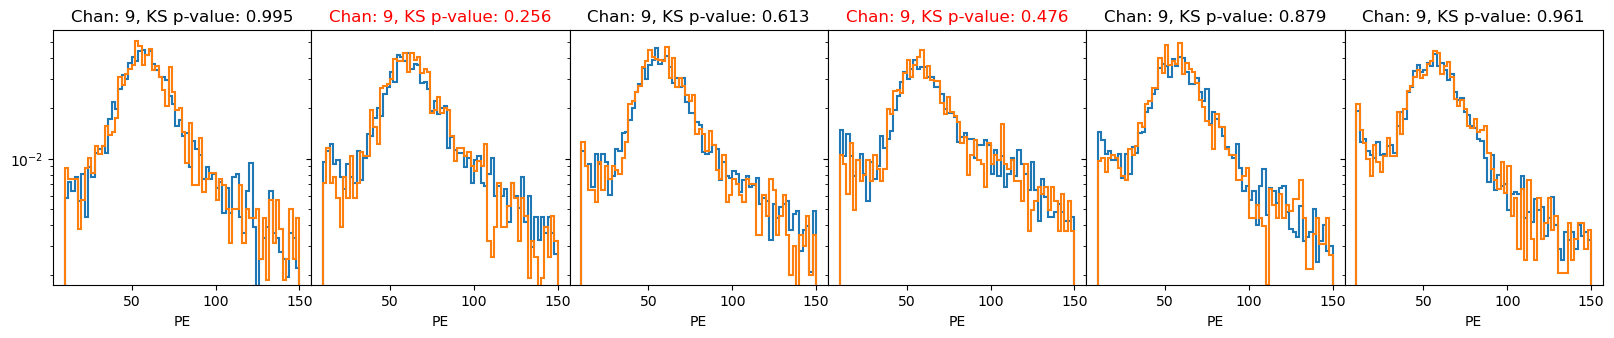

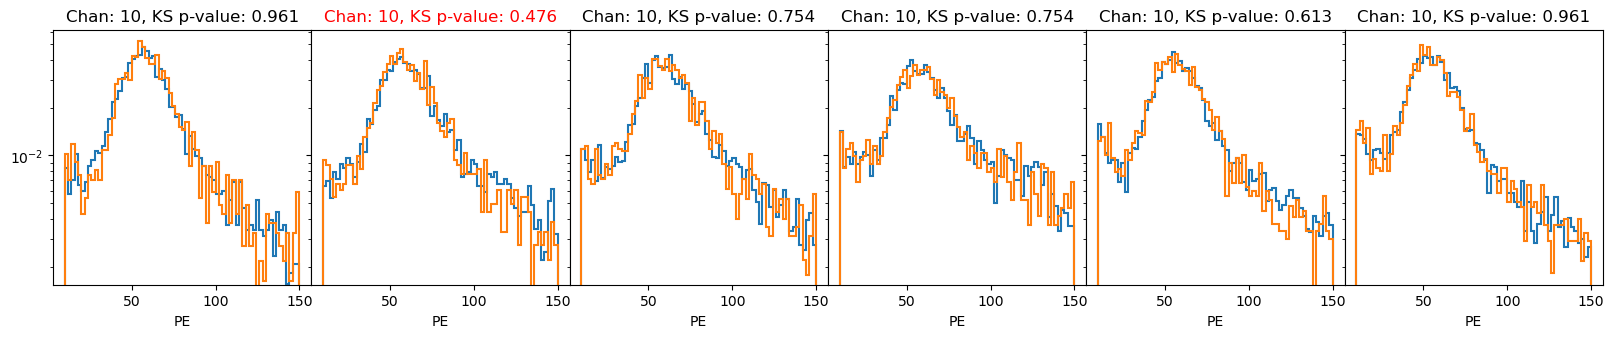

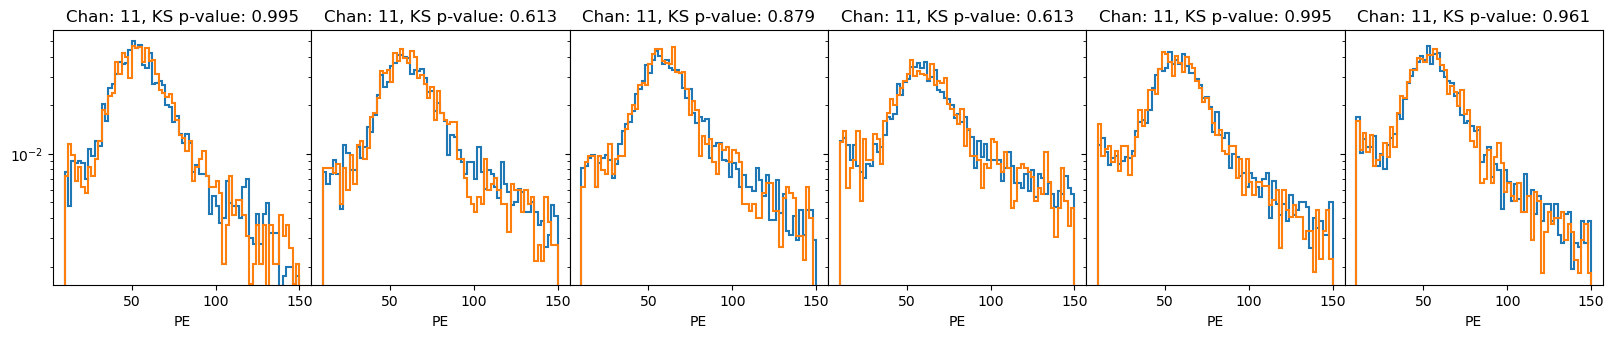

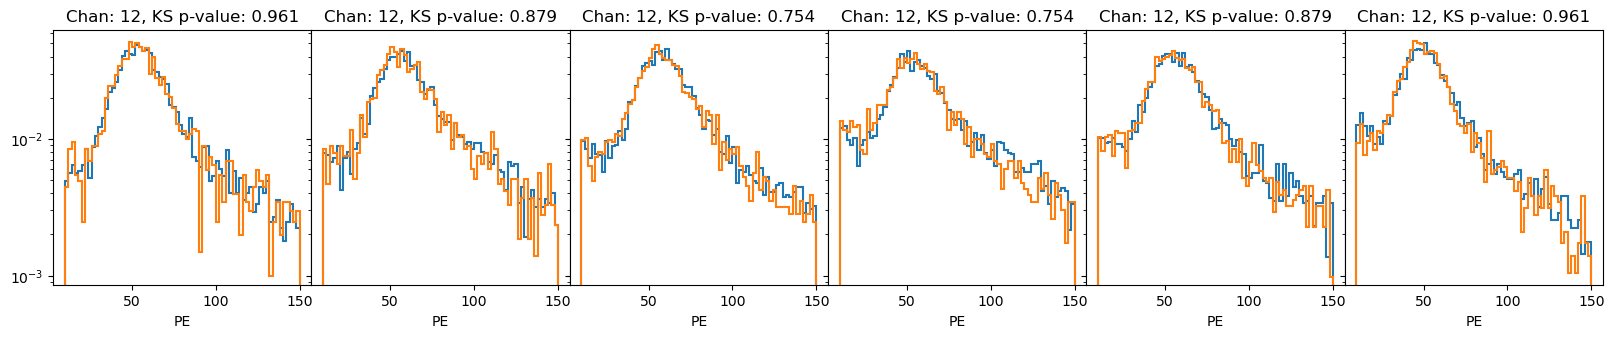

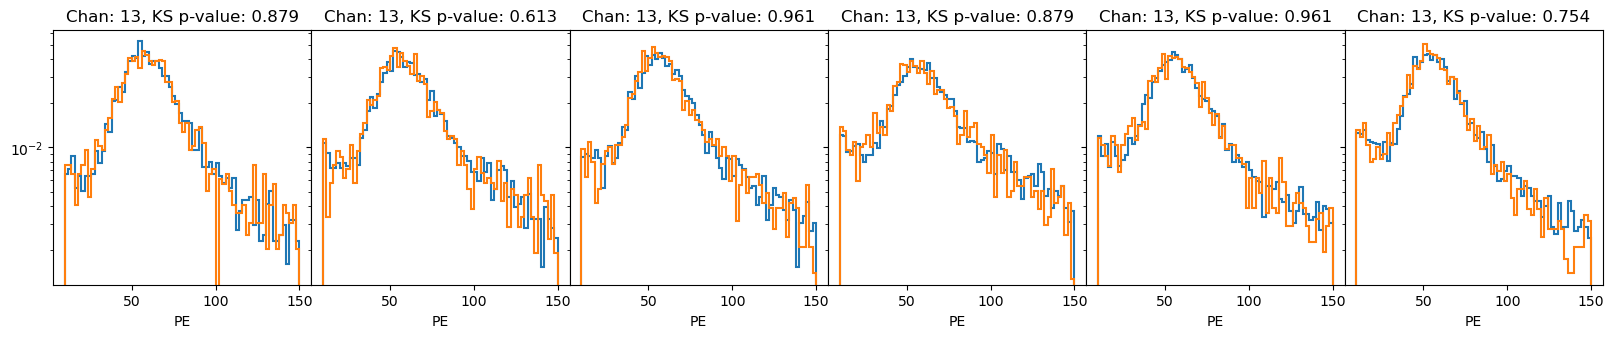

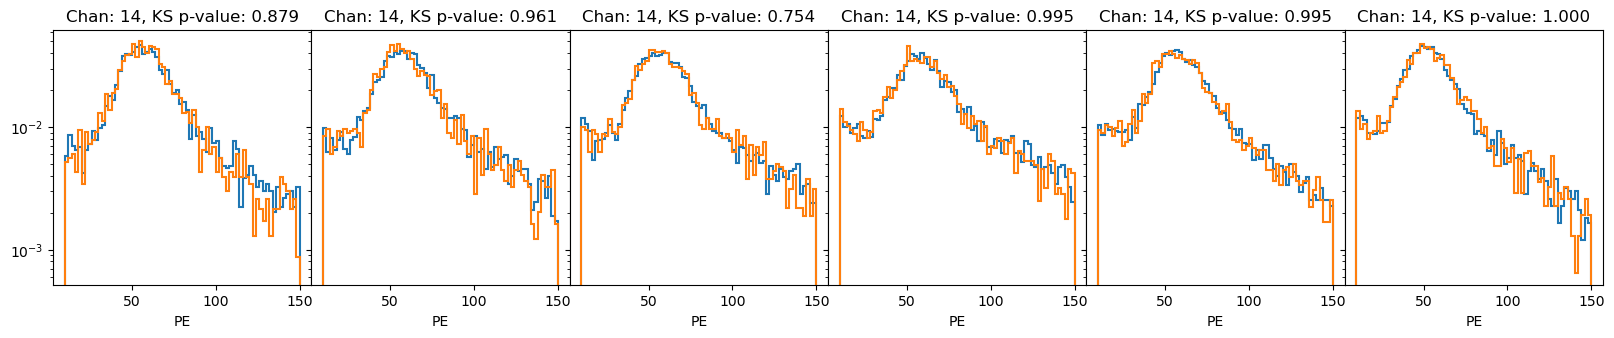

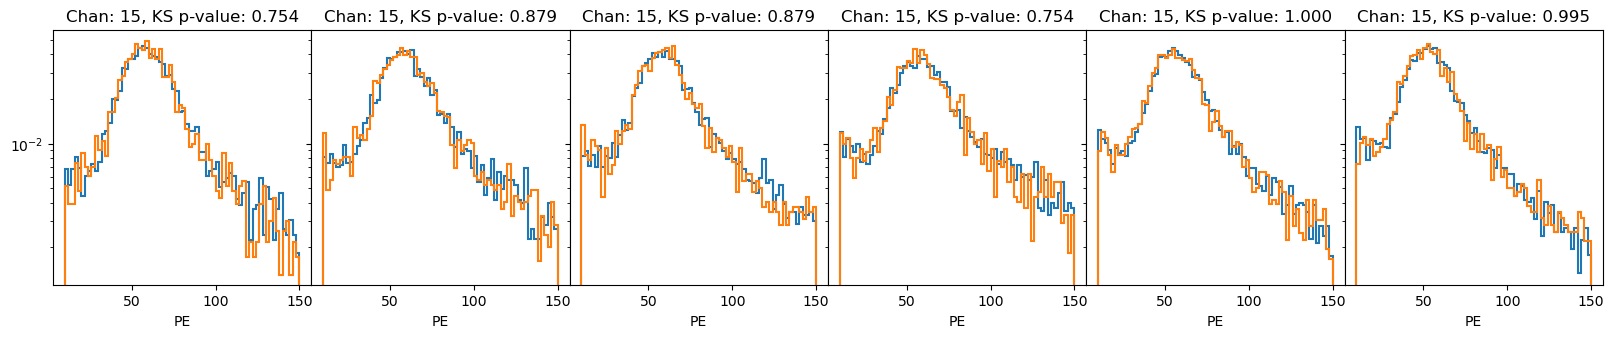

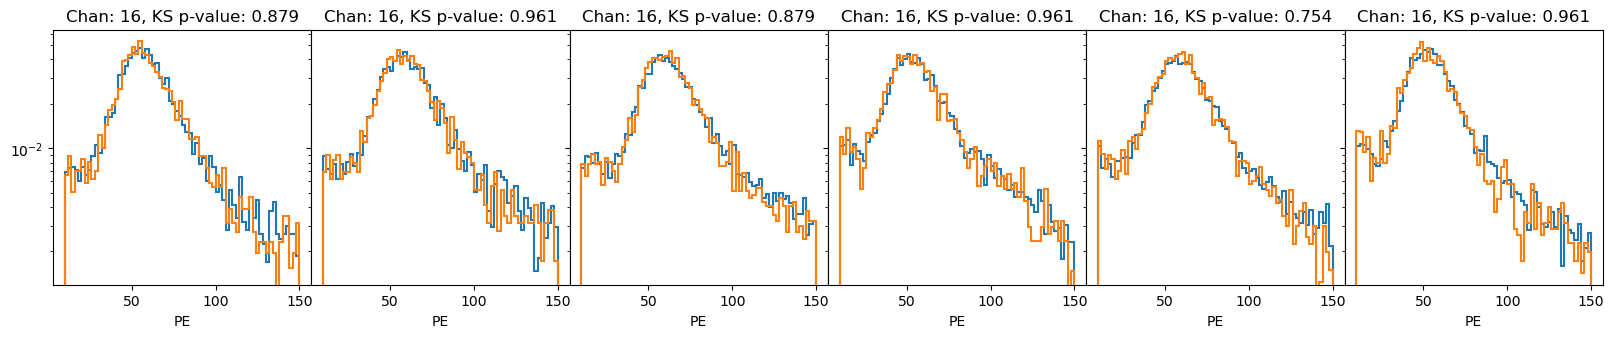

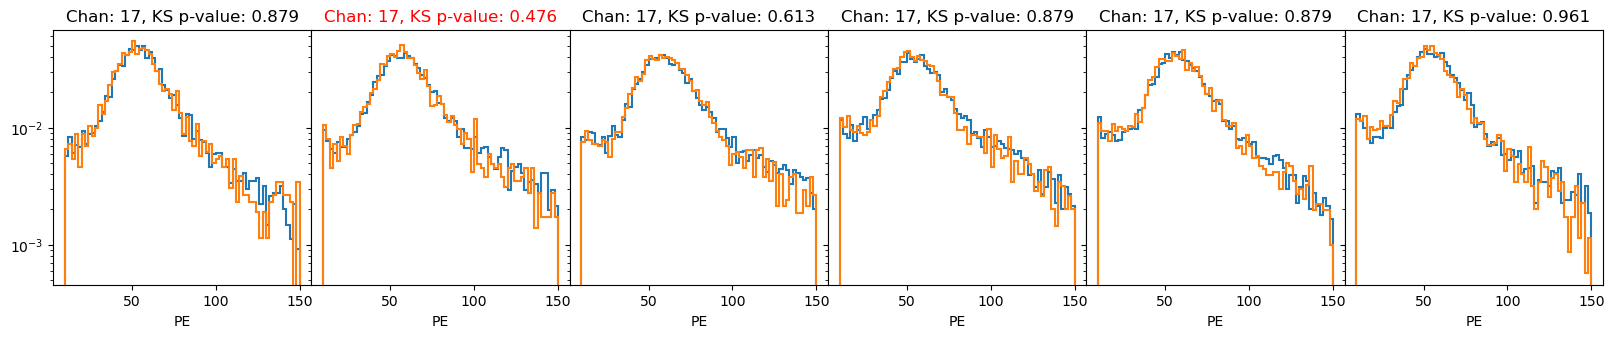

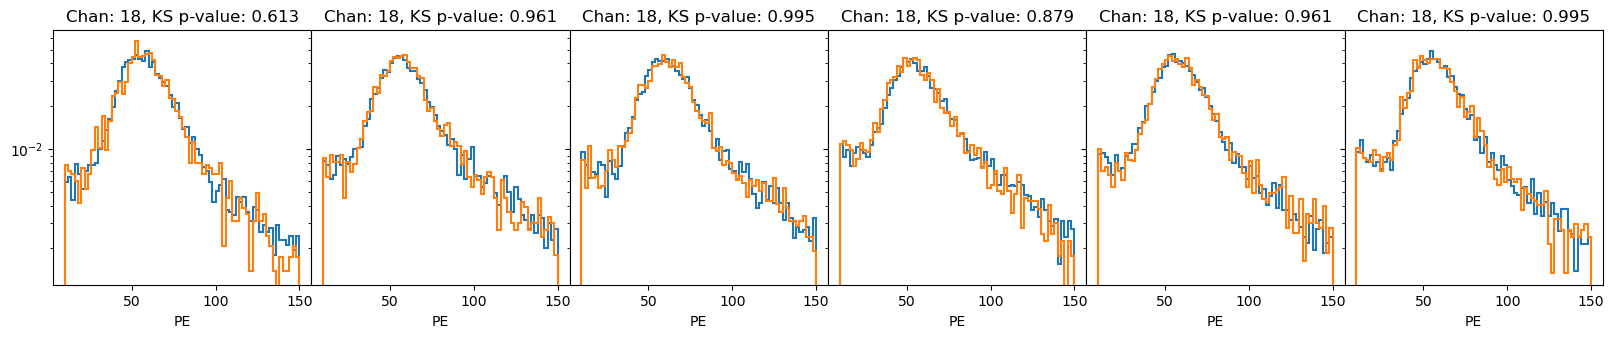

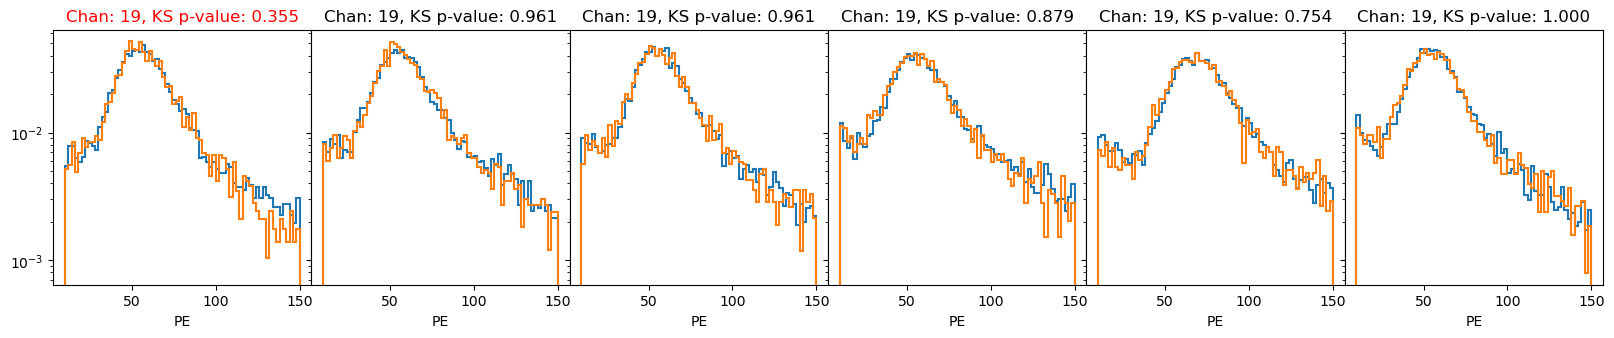

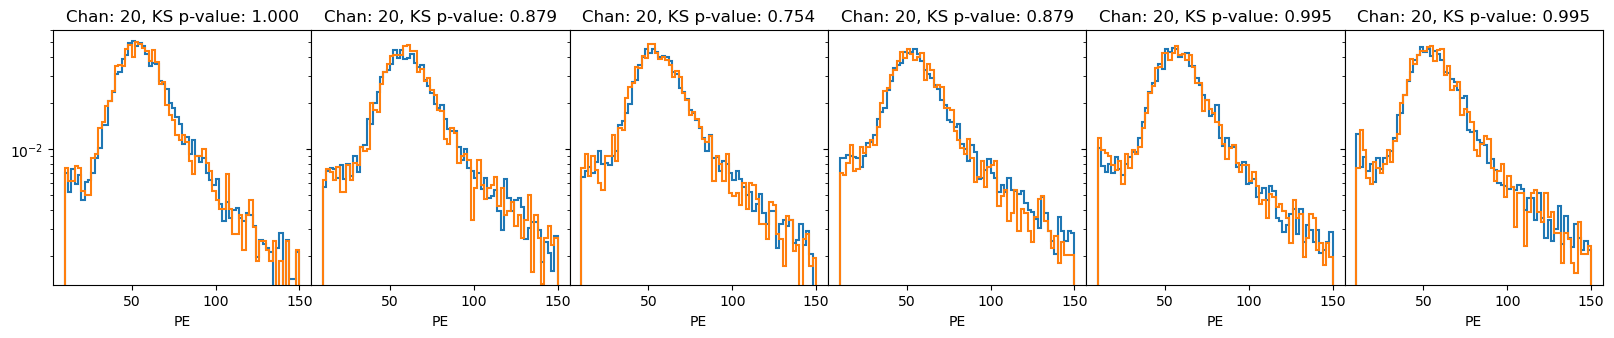

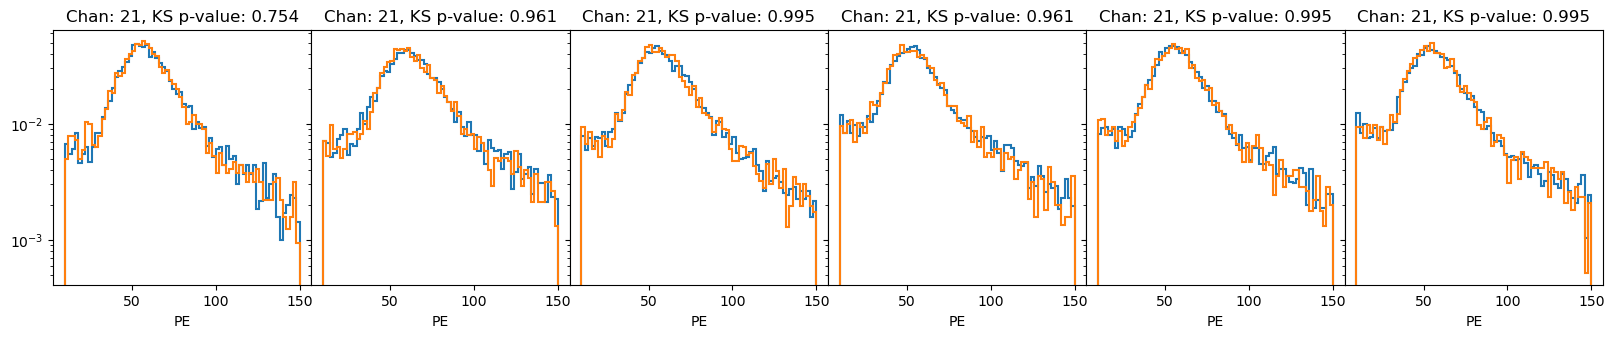

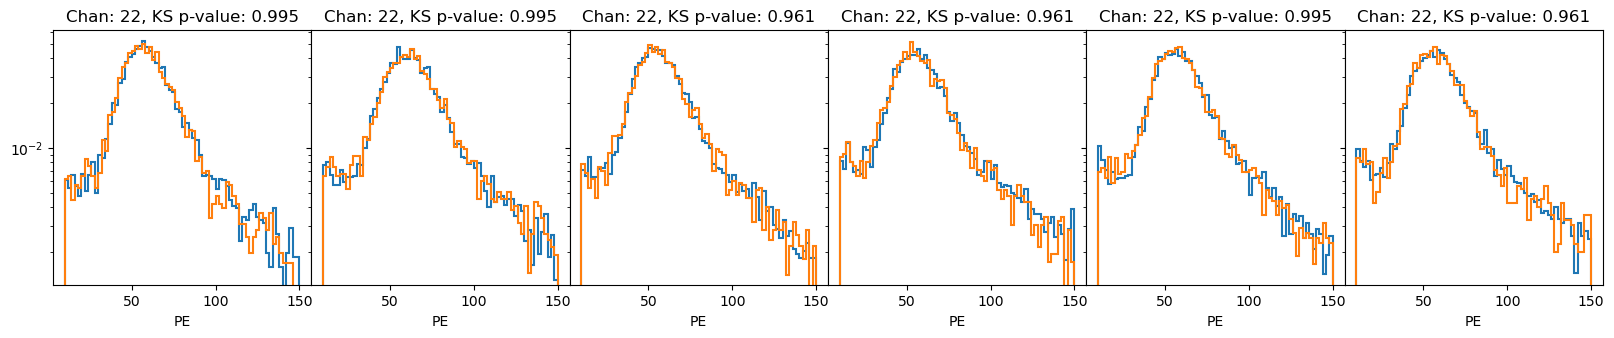

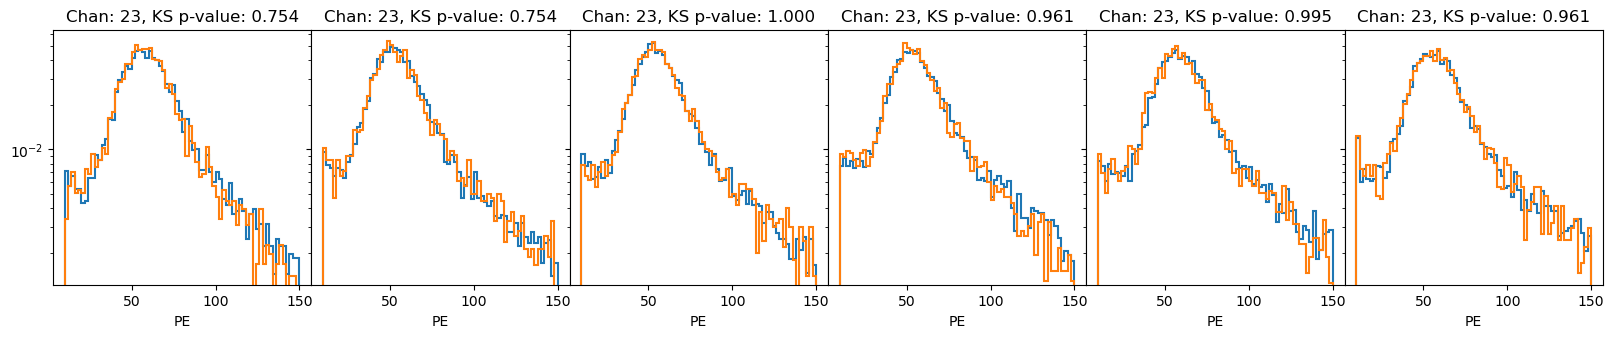

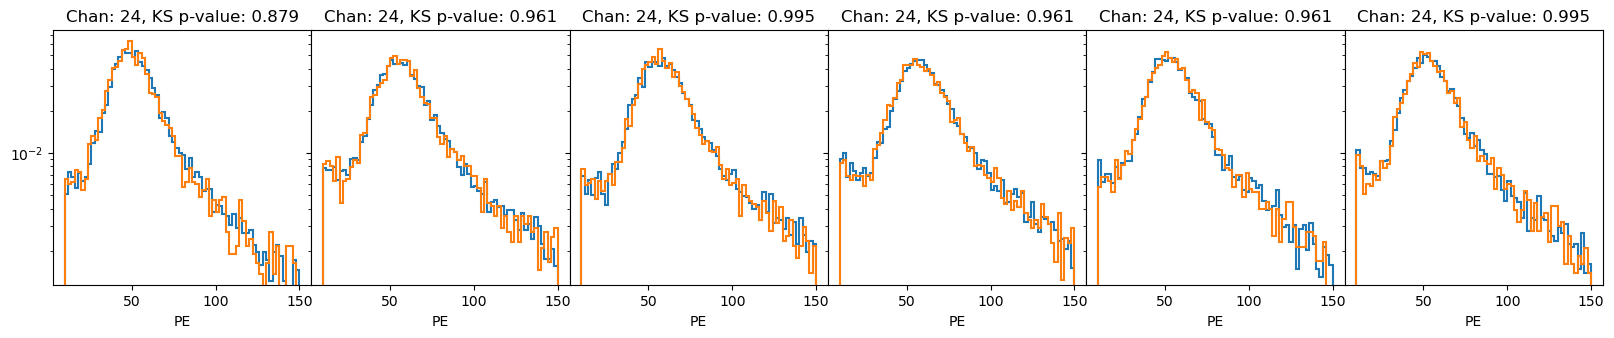

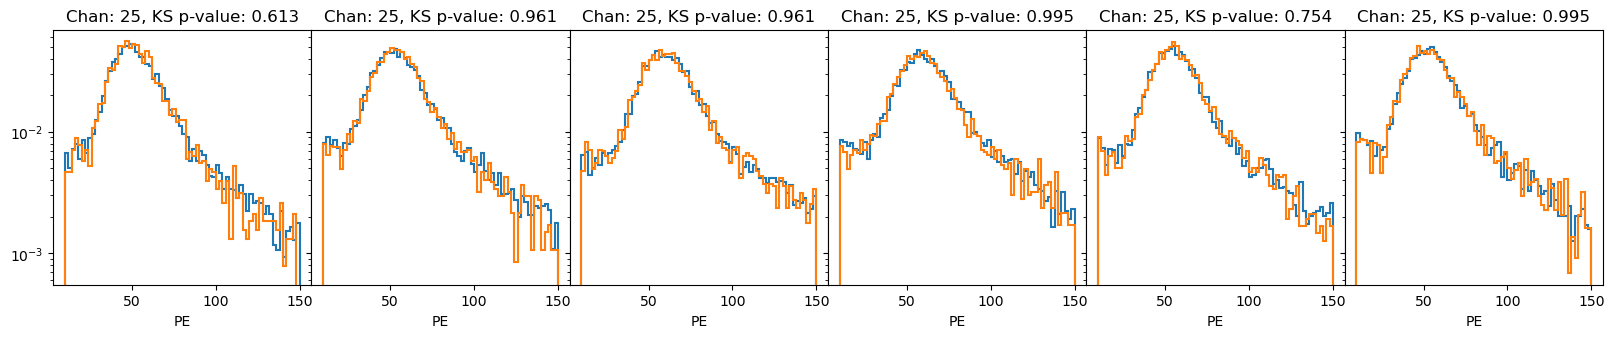

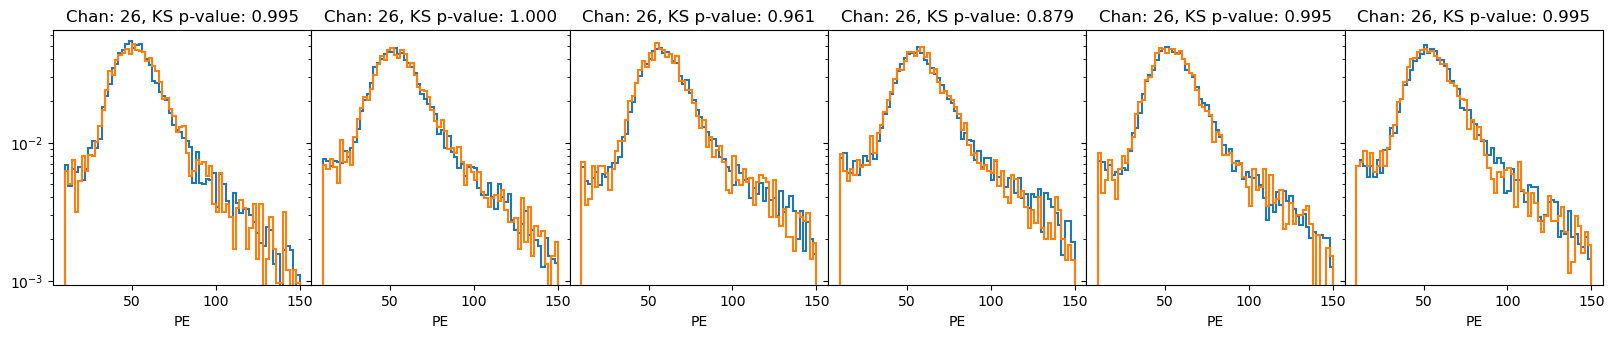

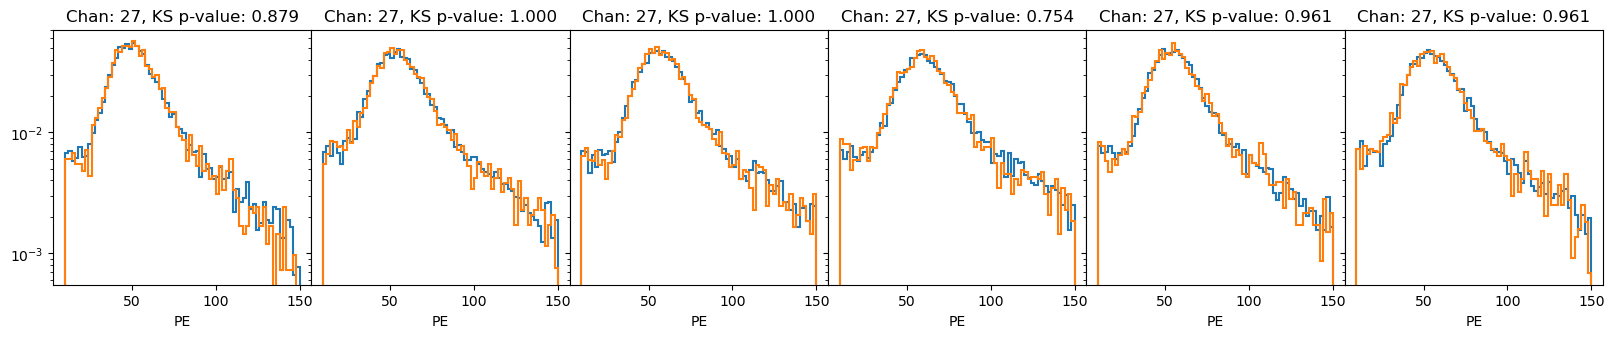

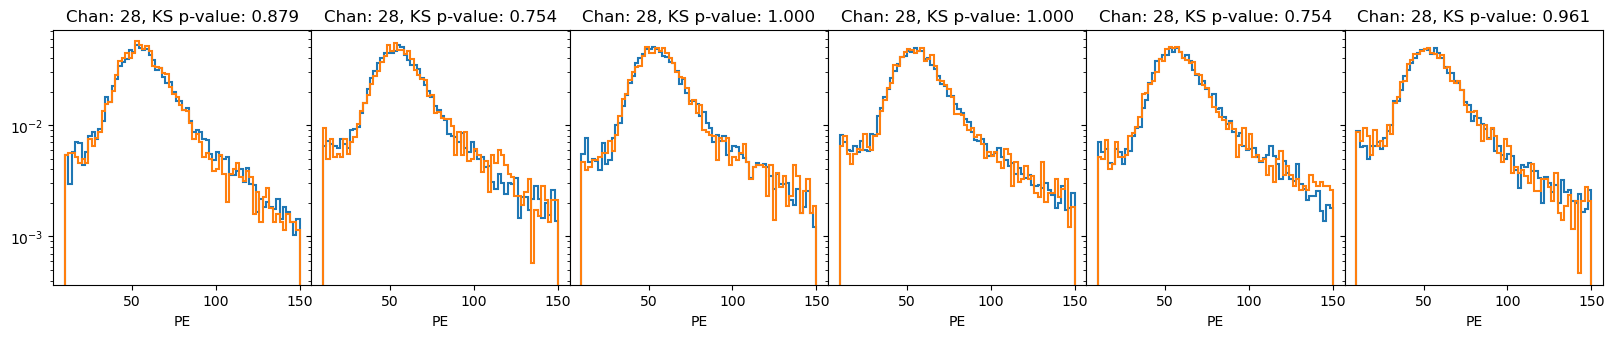

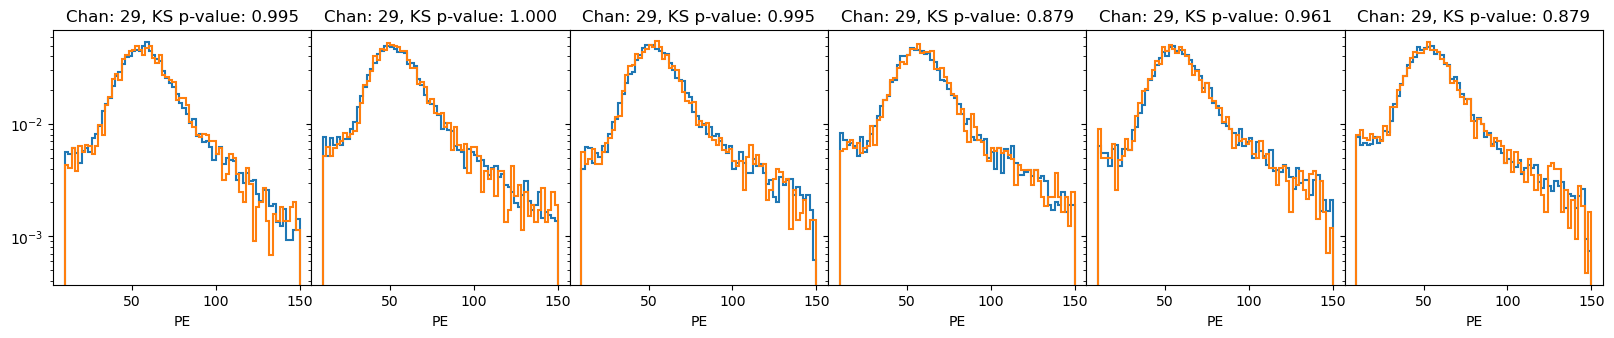

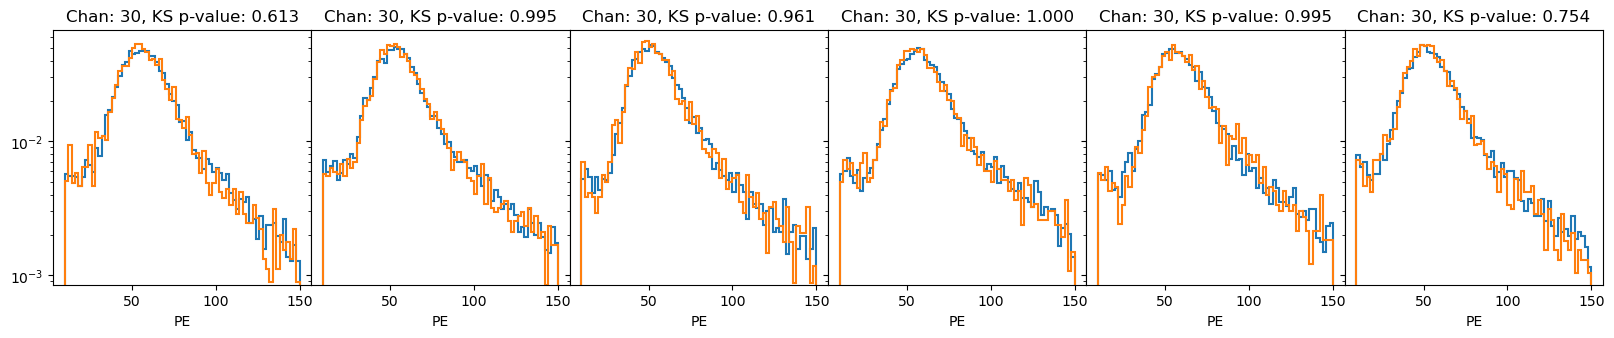

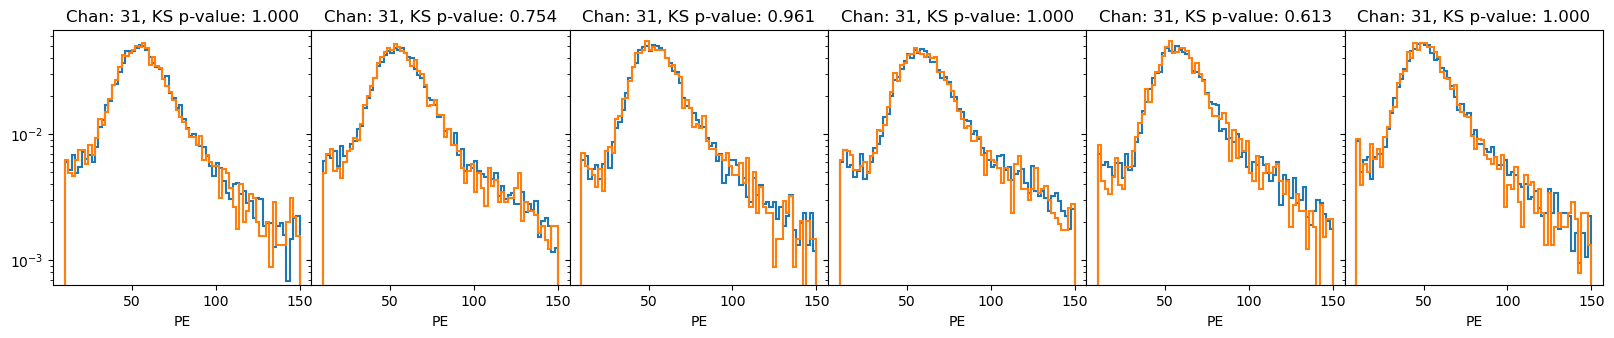

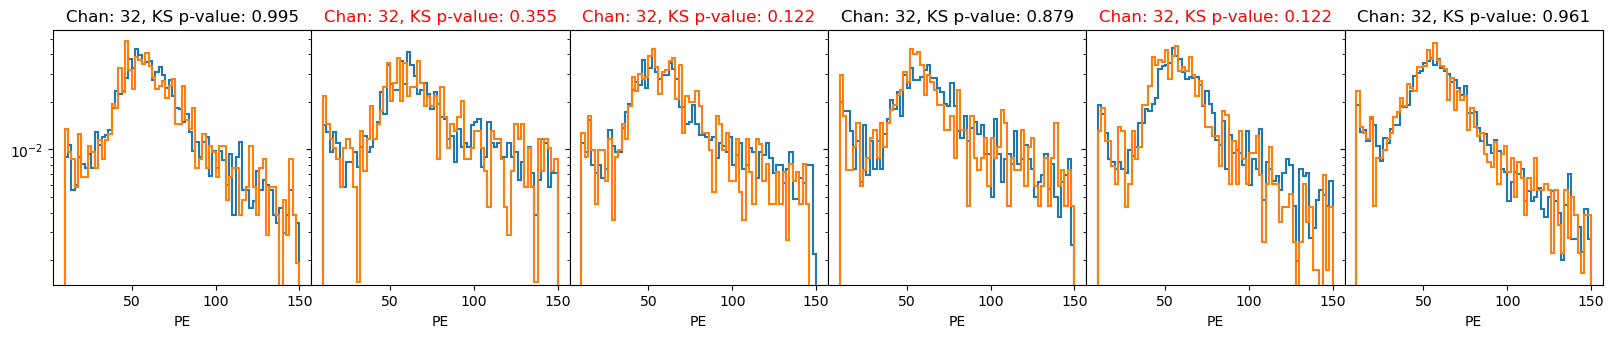

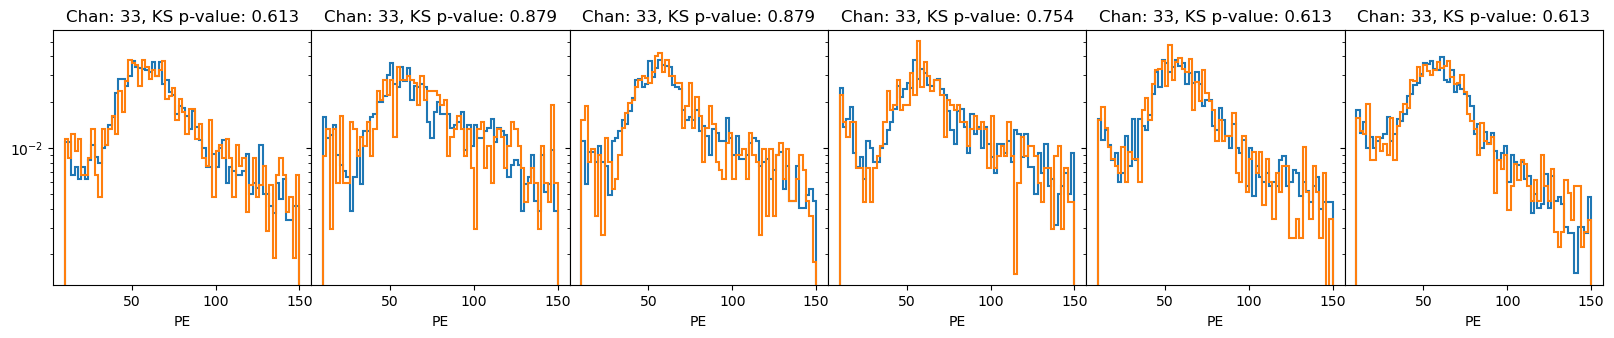

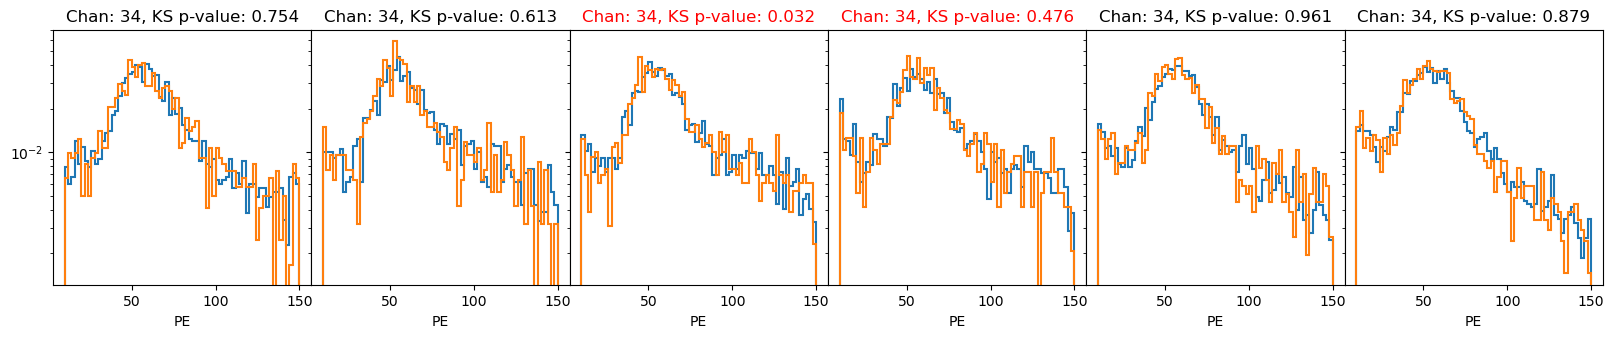

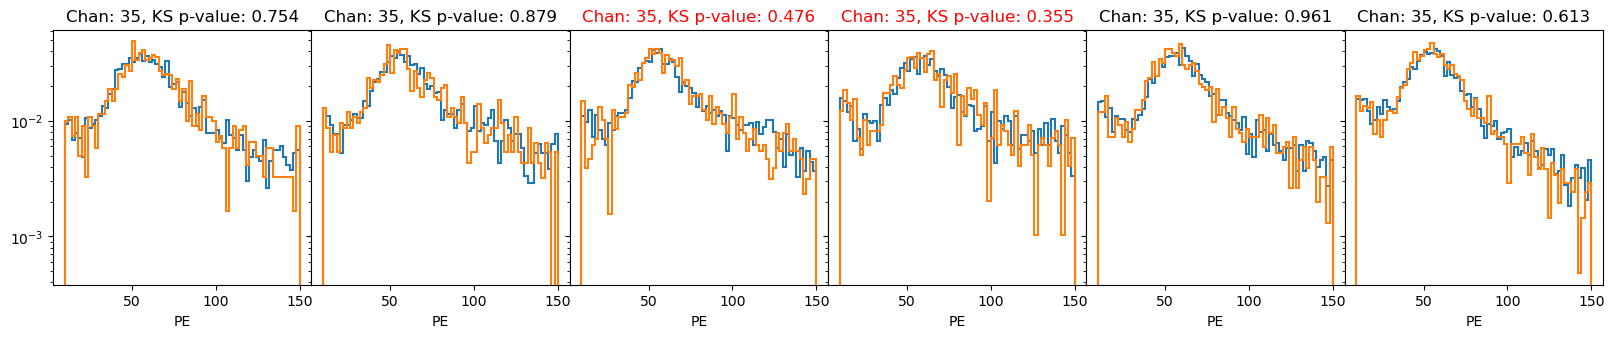

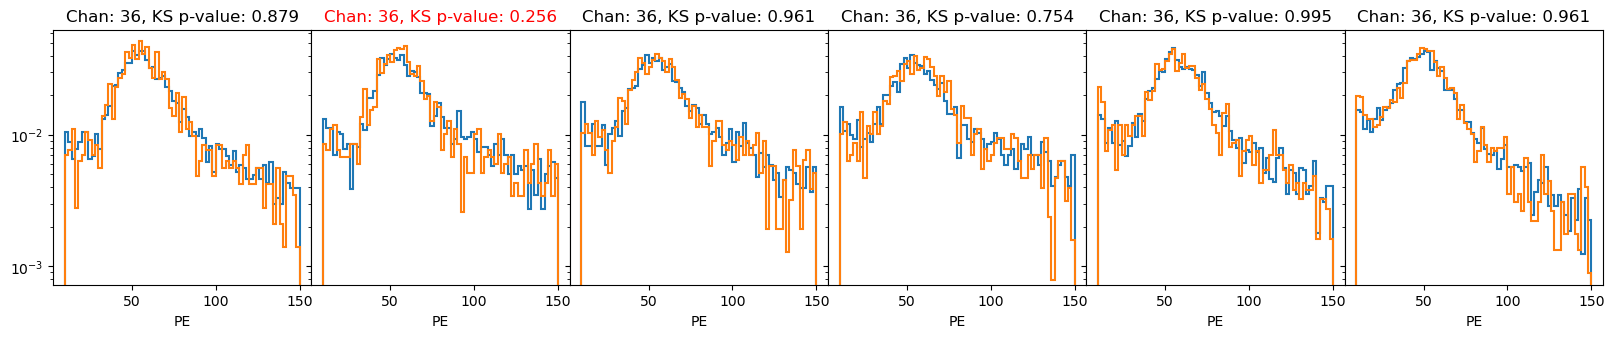

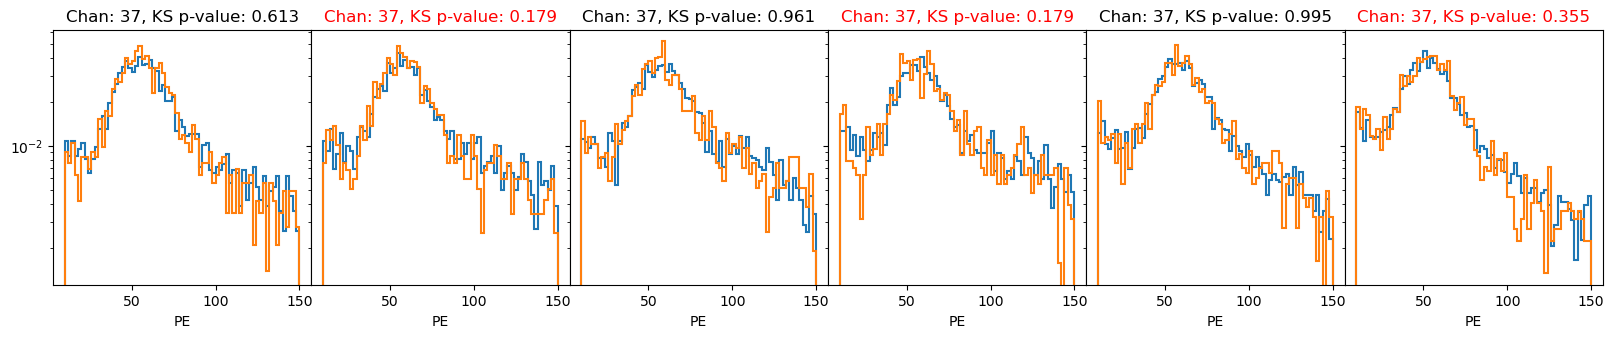

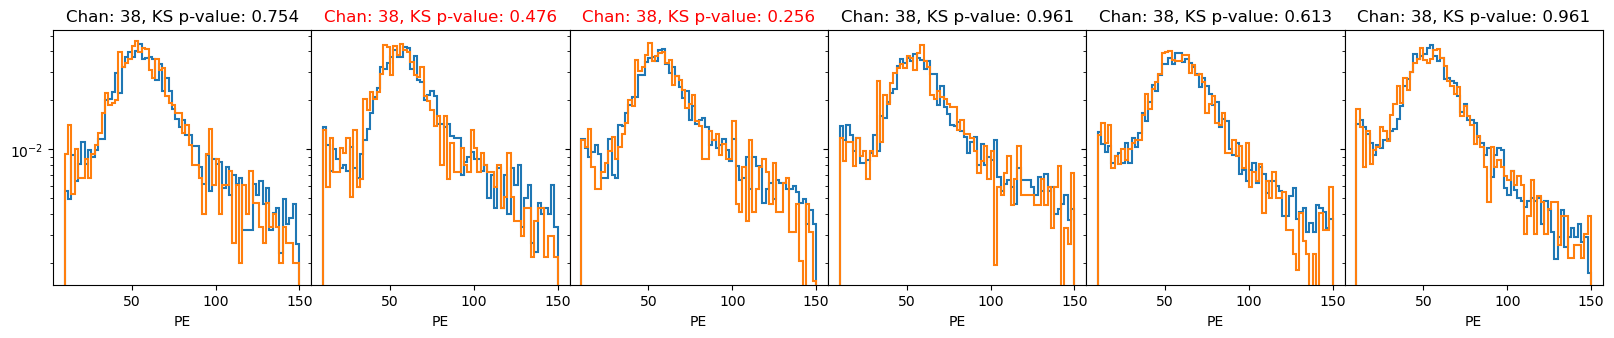

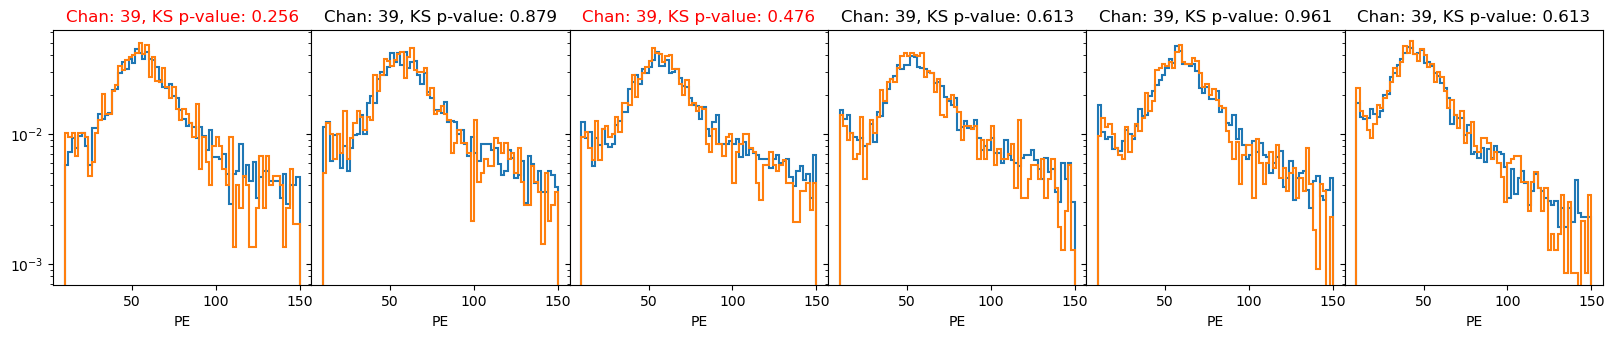

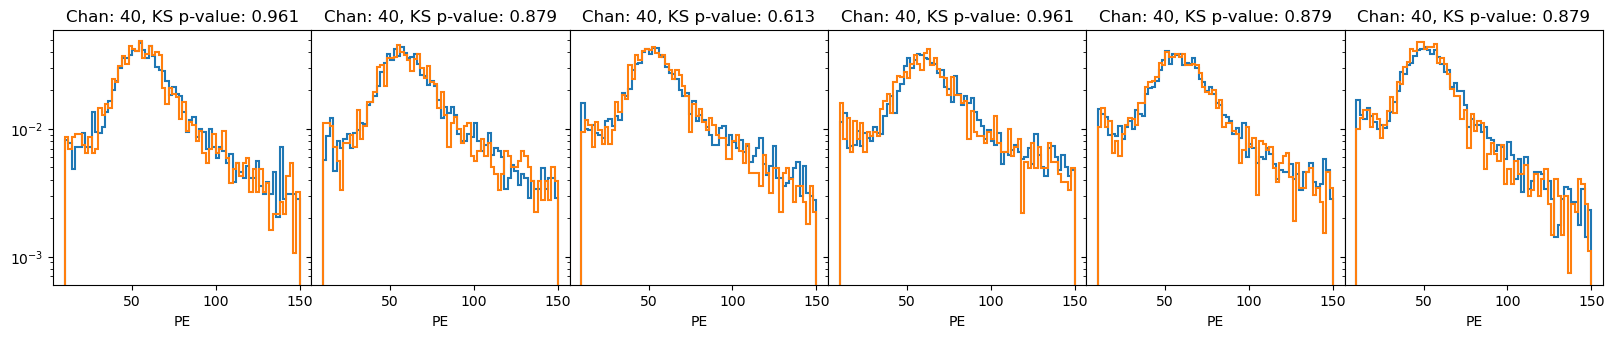

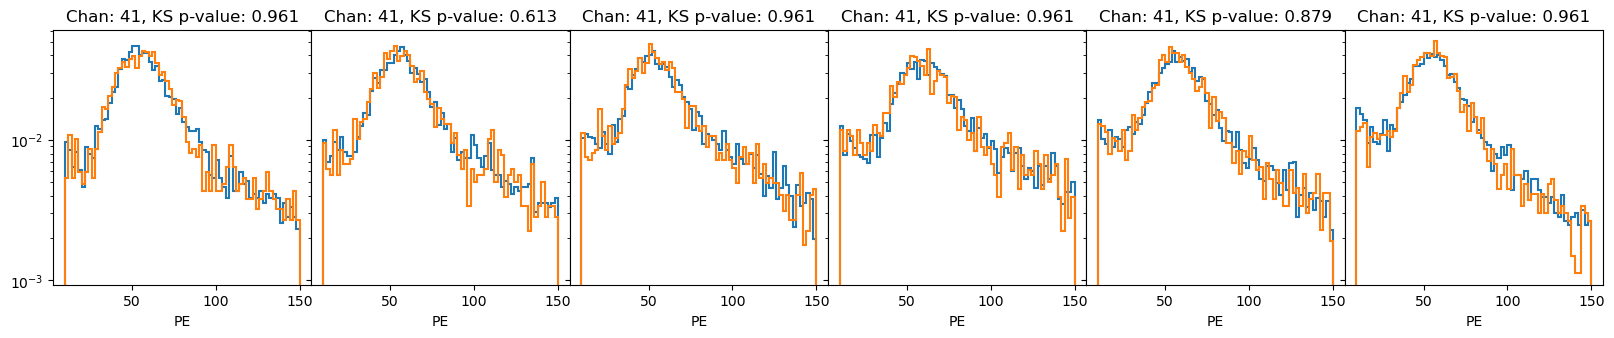

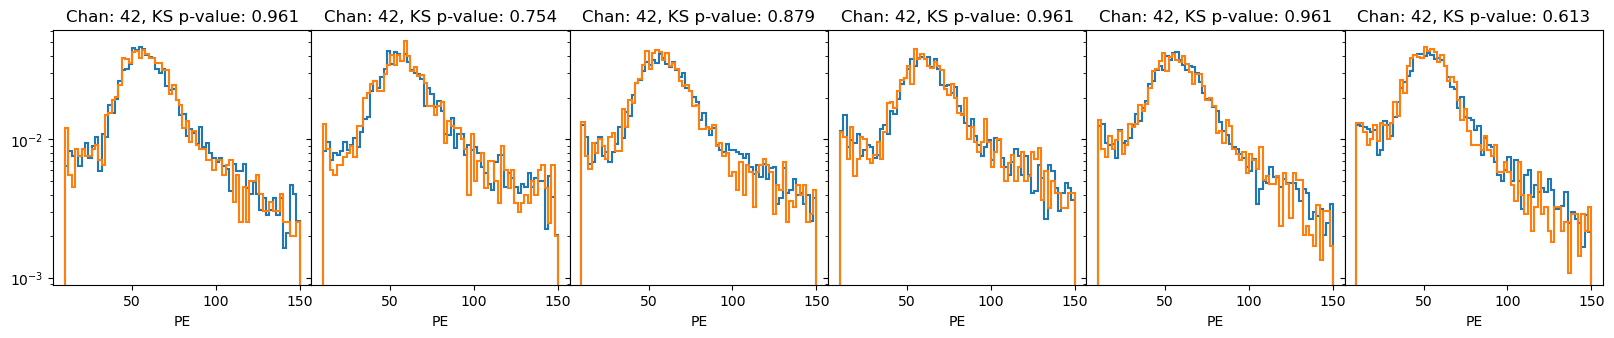

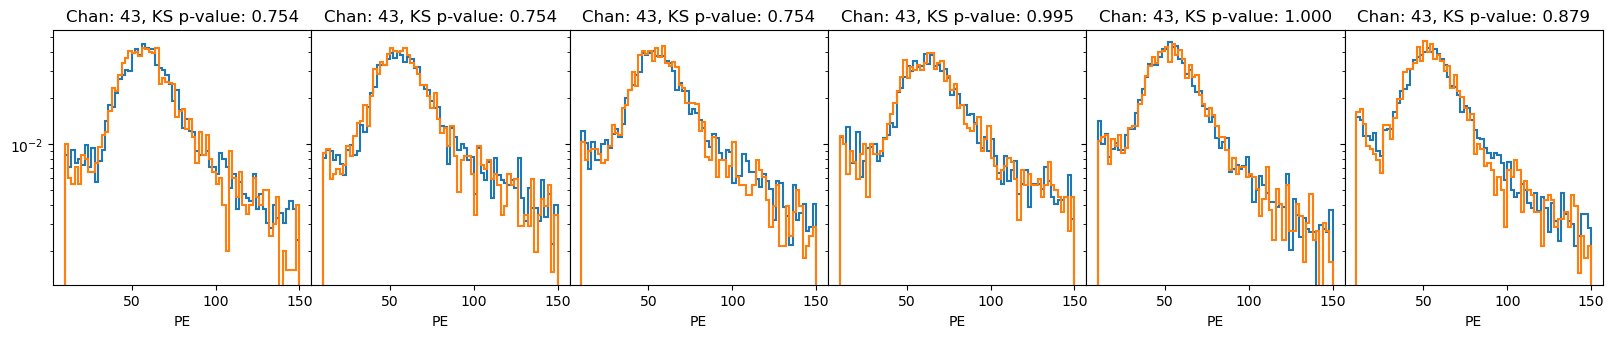

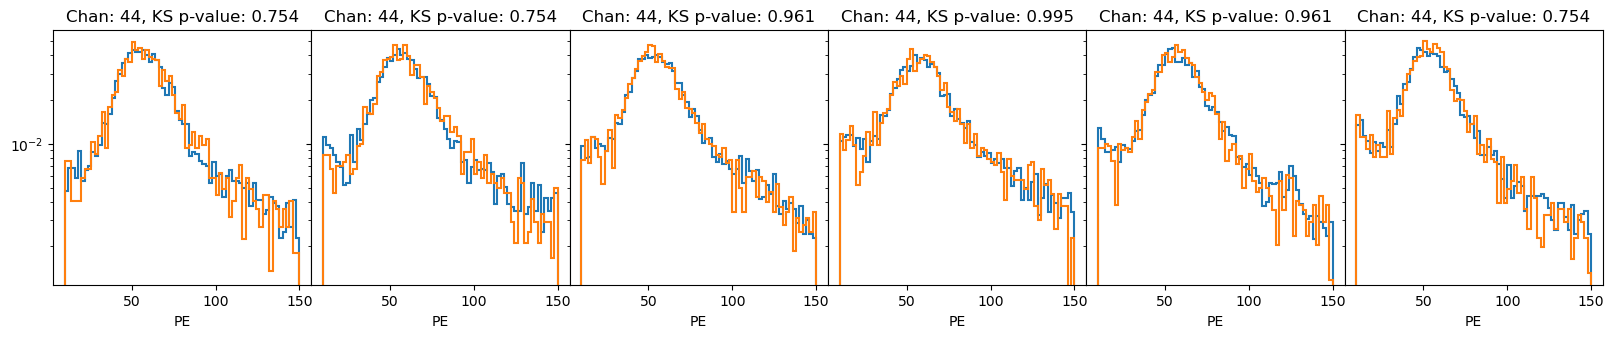

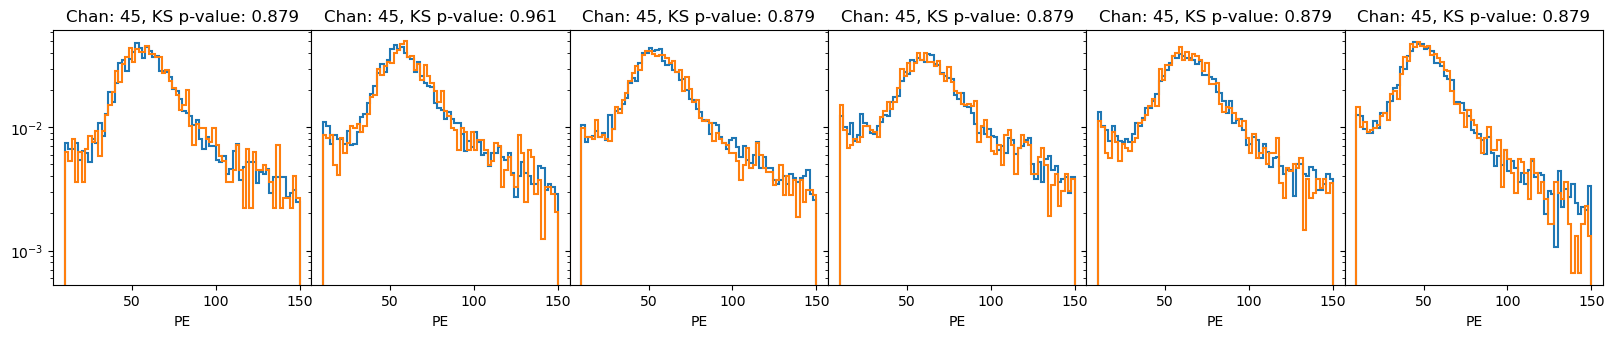

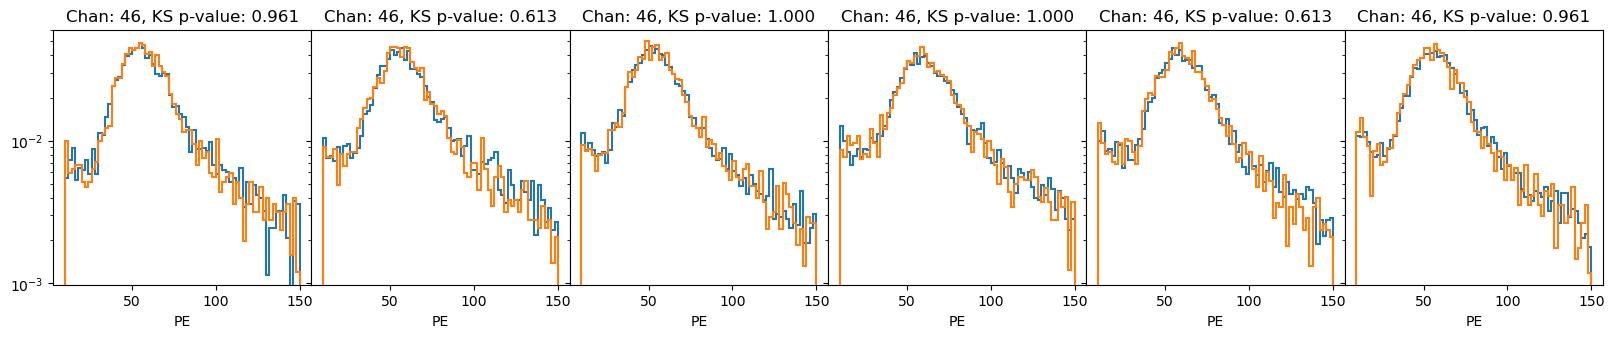

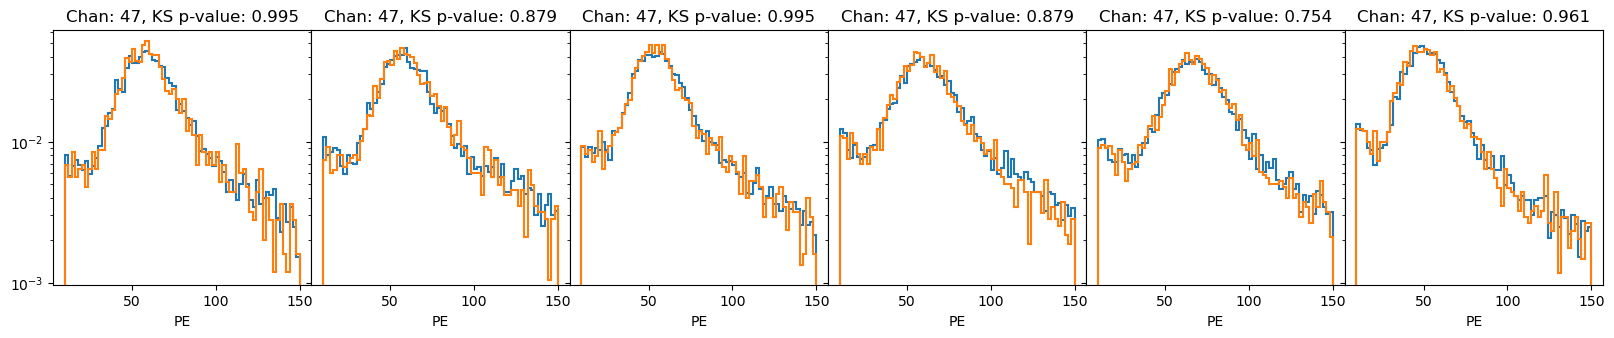

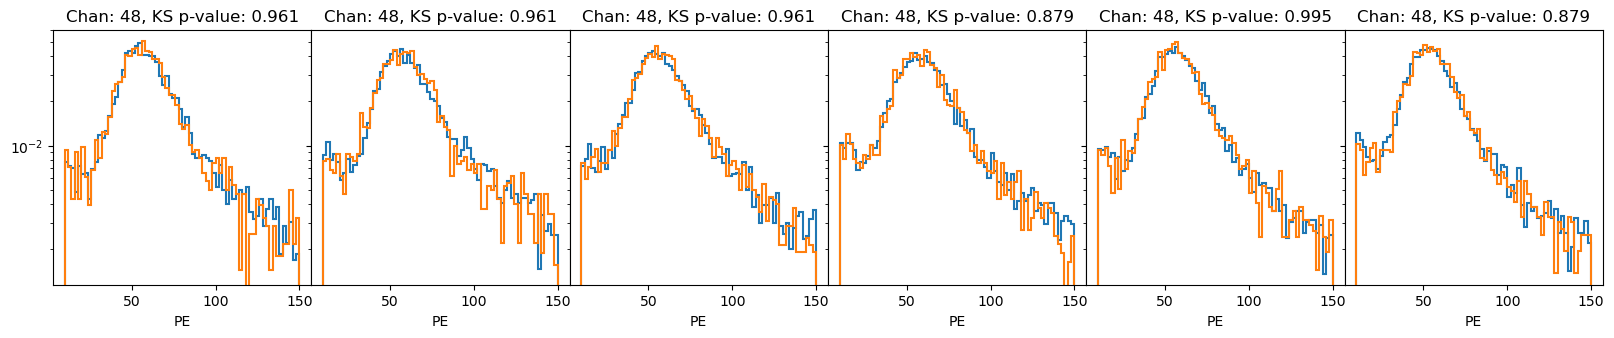

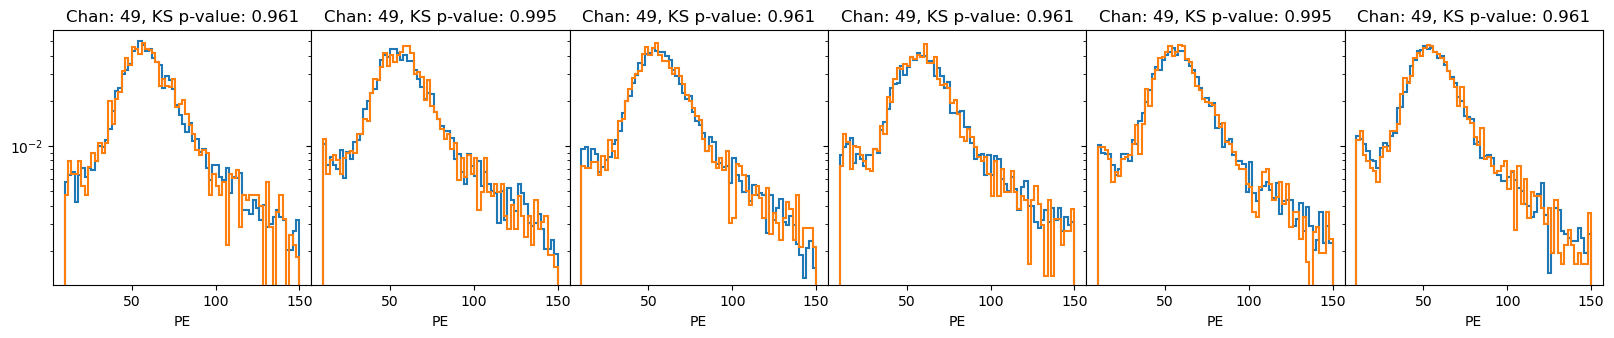

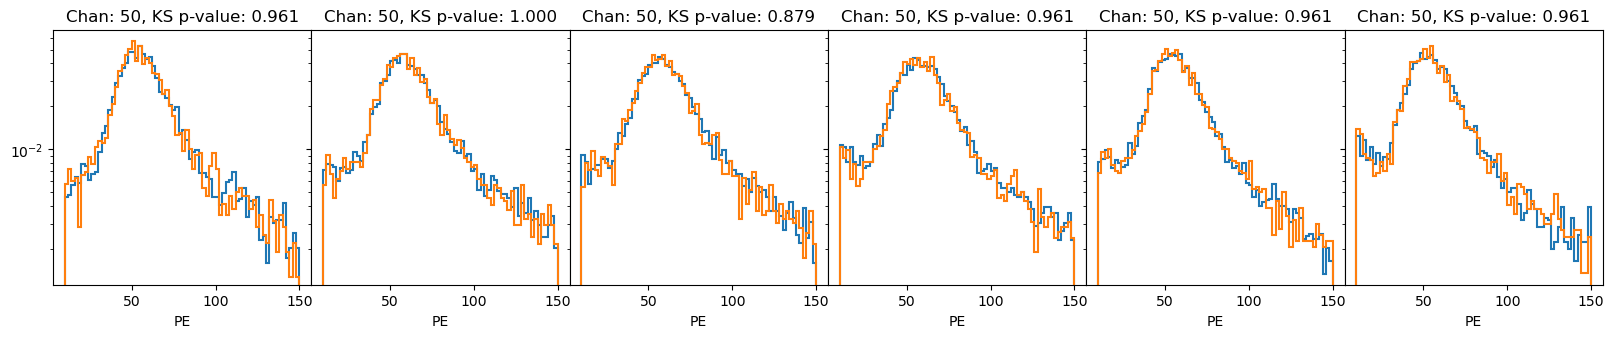

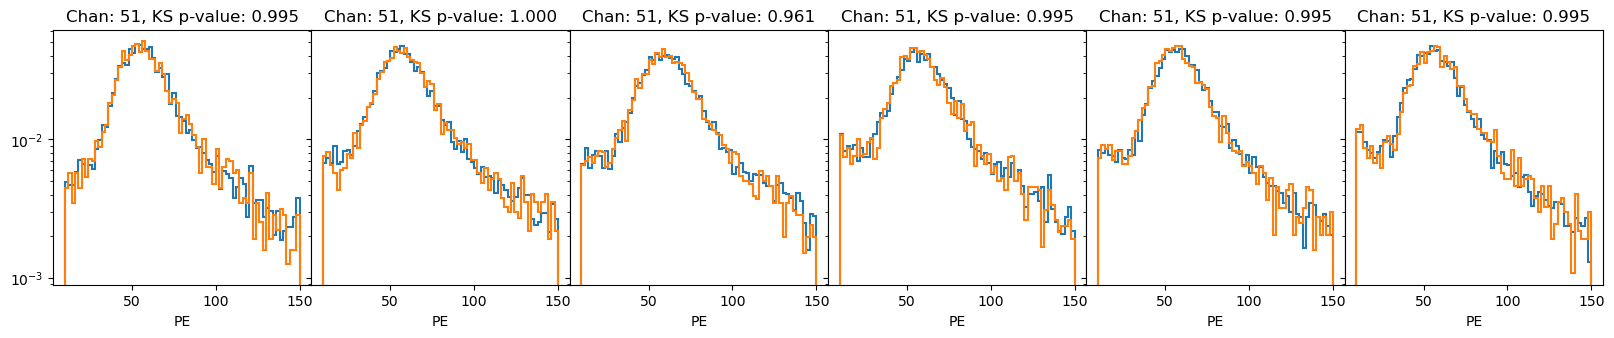

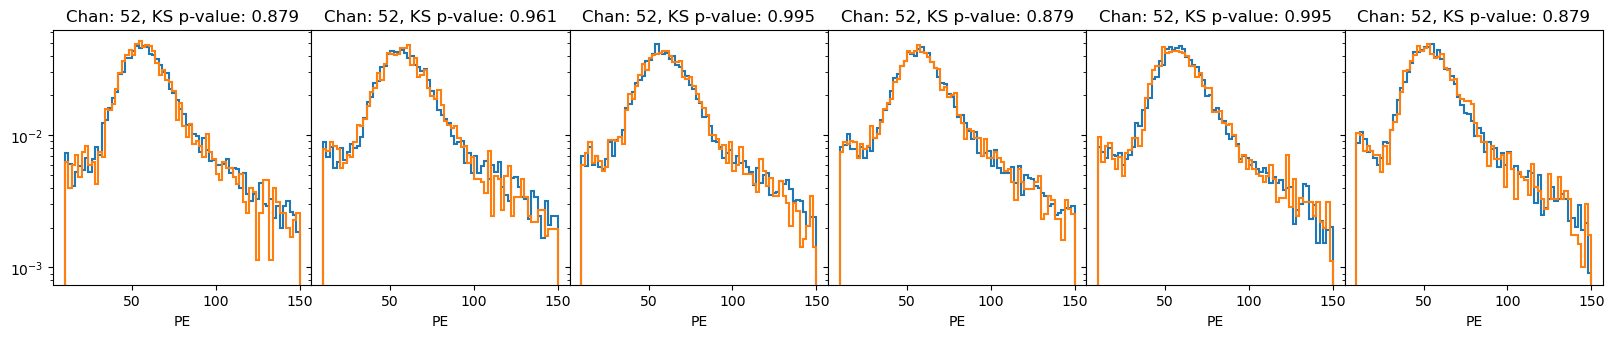

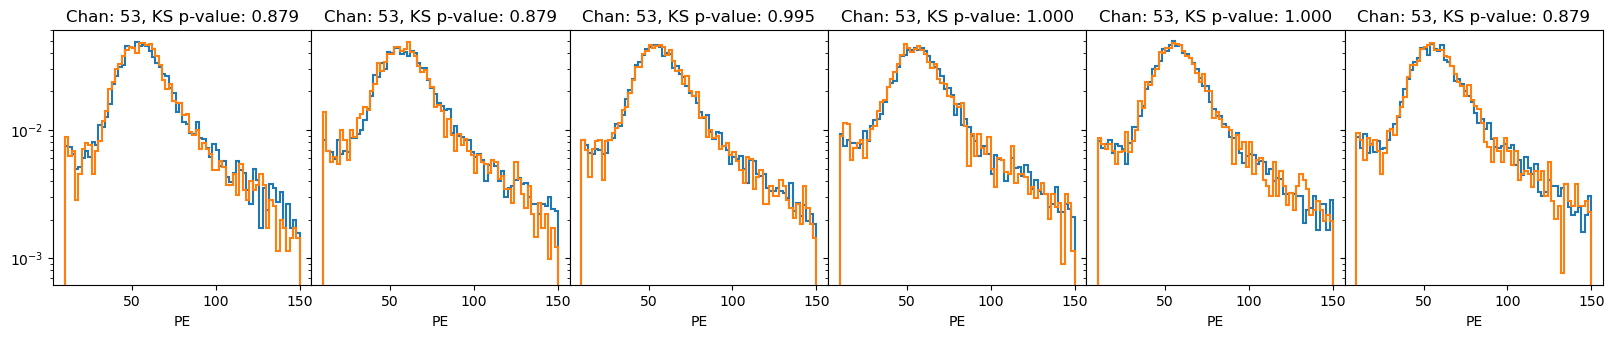

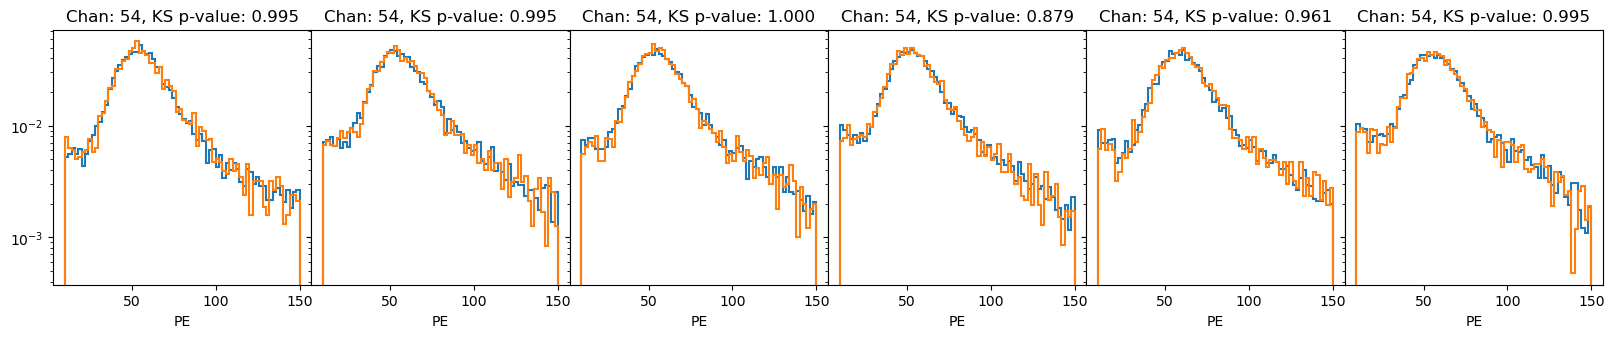

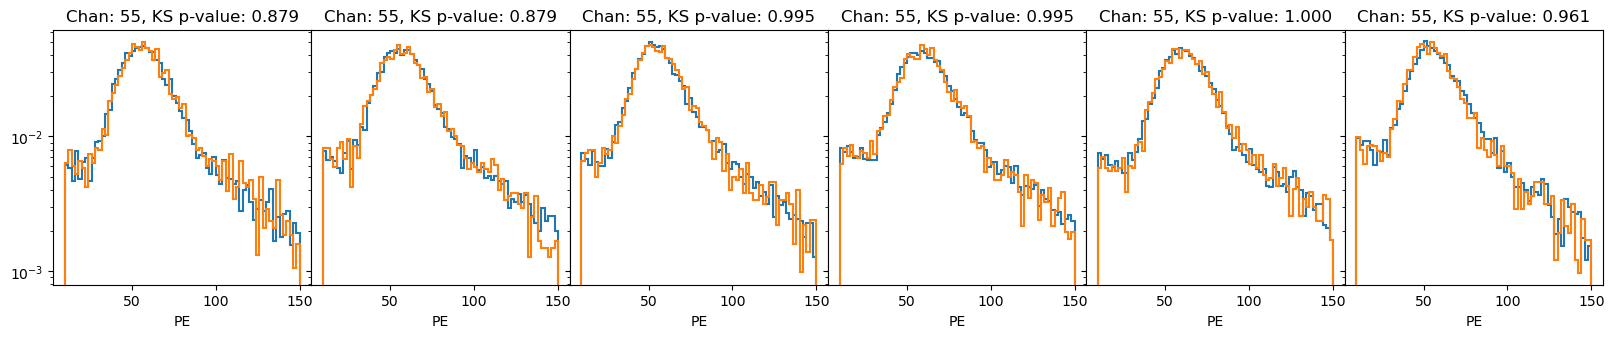

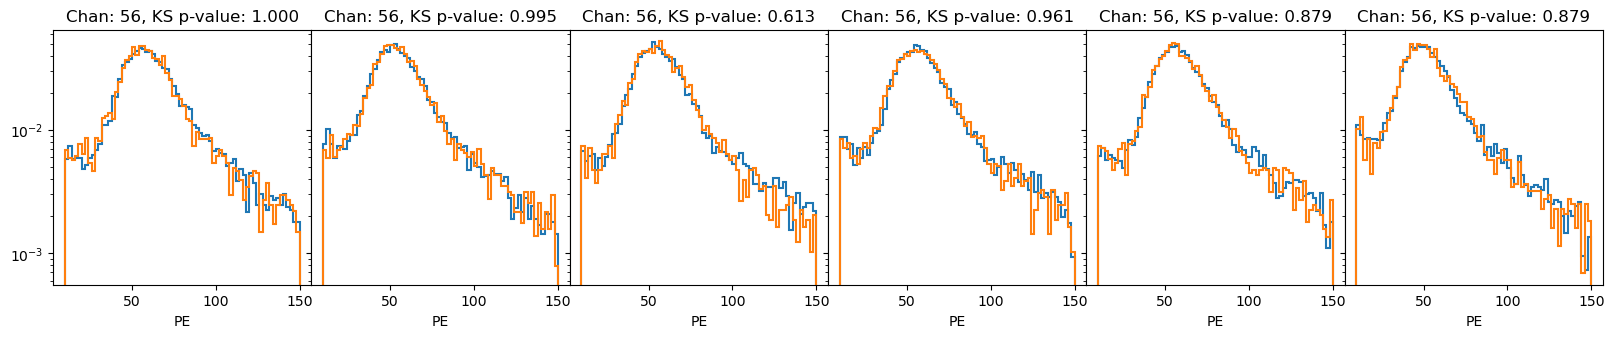

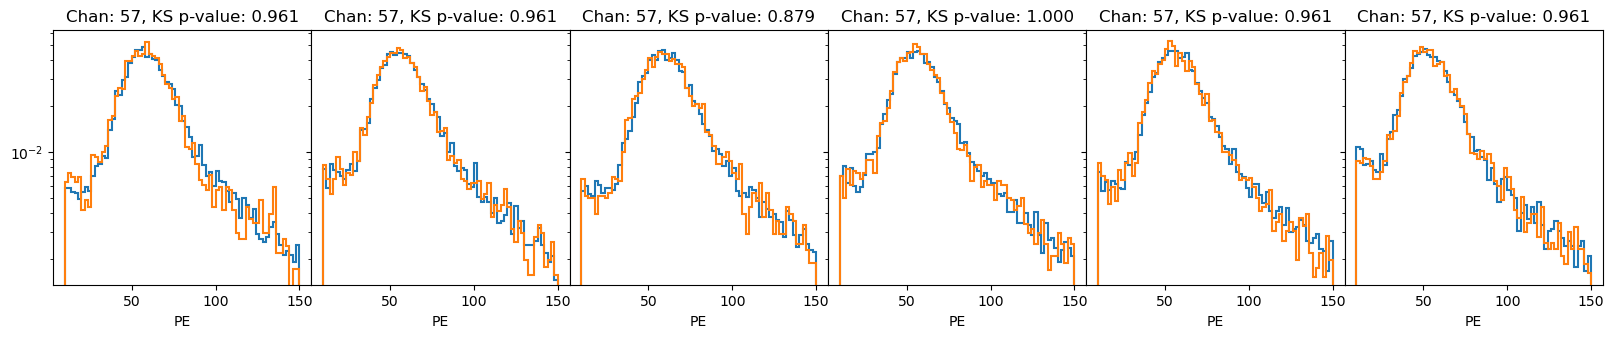

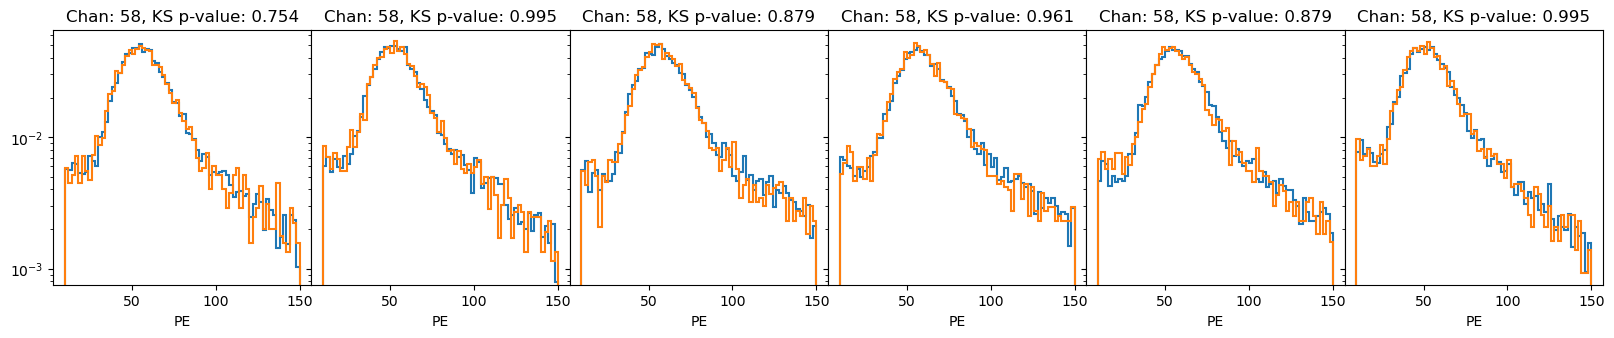

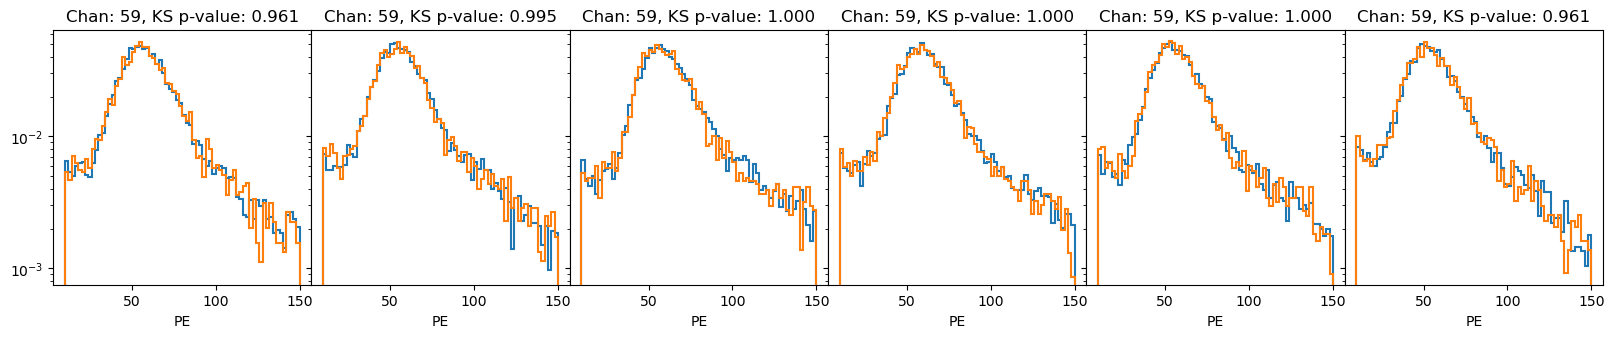

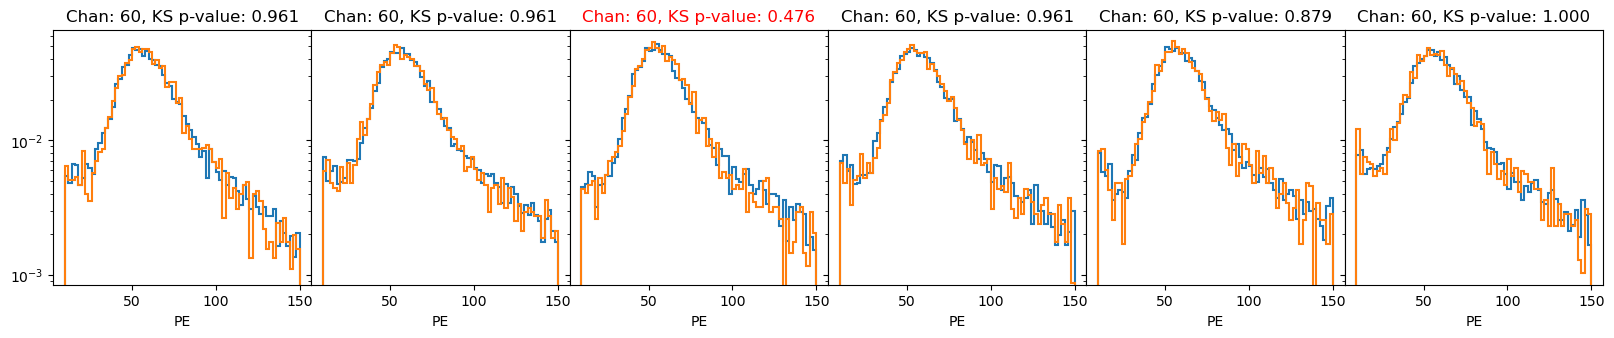

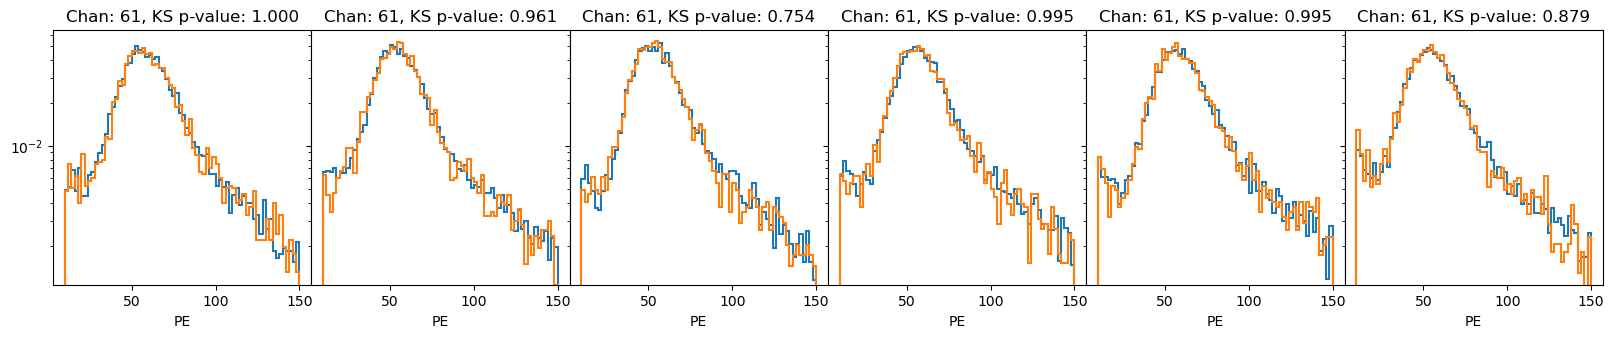

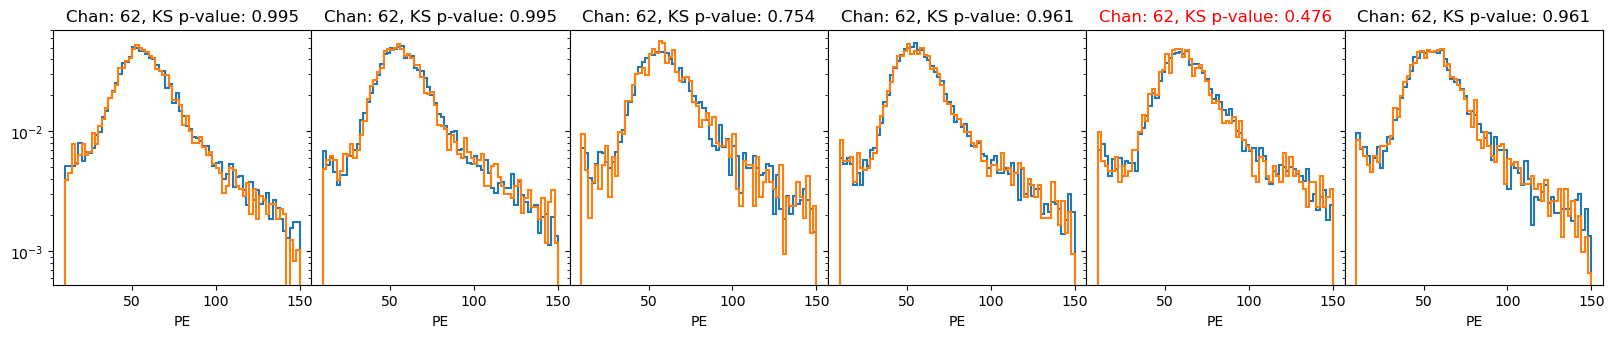

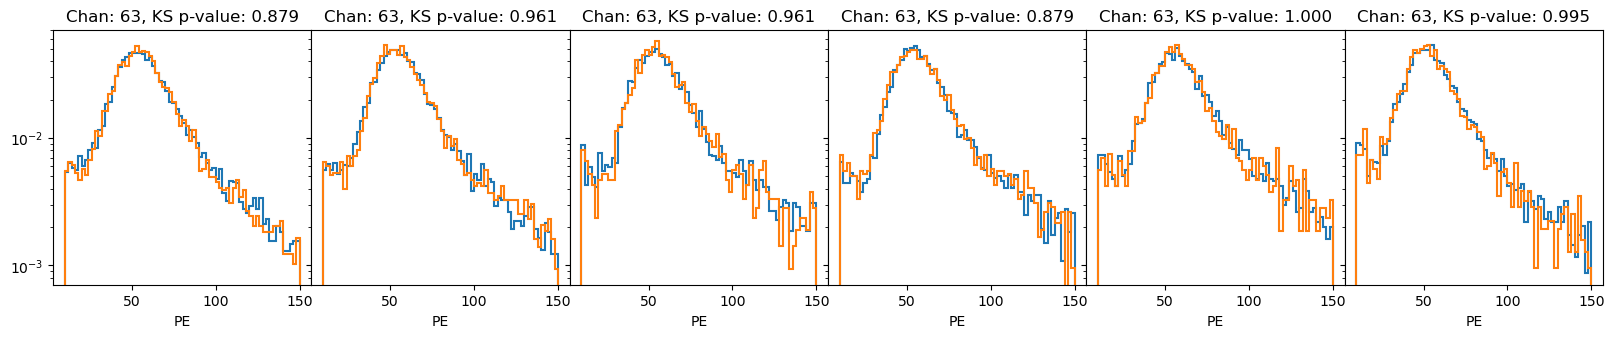

In [2]:
df = pd.DataFrame(columns=['chan', 'feb', 'ks'])

for chan in range(64):
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 3), sharey=True)
    for feb in range(6):
        plt.subplots_adjust(wspace=0)
        fig.subplots_adjust(top=0.96)

        h1 = file1["PEs_%d_%d"%(feb, chan)].to_hist()[5:] # convert to hist object and drop PEs below 10
        h2 = file2["PEs_%d_%d"%(feb, chan)].to_hist()[5:]
        
        h1 = h1/h1.sum()
        h2 = h2/h2.sum()
        
        h1.plot(ax=ax[feb]);
        h2.plot(ax=ax[feb]);

        ks = stats.ks_2samp(h1.to_numpy()[0], h2.to_numpy()[0])[1]
        if ks<0.5:
            ax[feb].set_title("Chan: %d, KS p-value: %.3f"%(chan, ks), color="red")
        else:
            ax[feb].set_title("Chan: %d, KS p-value: %.3f"%(chan, ks))
            
        plt.yscale('log')
        
        new_row = {'chan': chan, 'feb': feb, 'ks': ks}
        df.loc[len(df)] = new_row

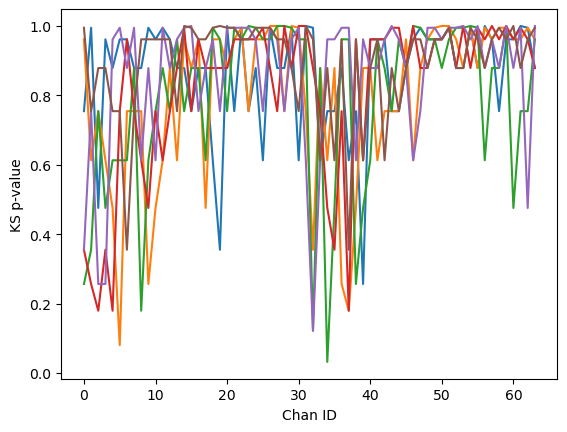

In [5]:
for feb in range(6):
    plt.plot(df.query('feb==%d'%feb)['chan'], df.query('feb==%d'%feb)['ks'], '-');
    plt.xlabel('Chan ID')
    plt.ylabel('KS p-value')

In [19]:
import subprocess
usexroot = False
defname = 'rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.root'
commands = ("source /cvmfs/mu2e.opensciencegrid.org/setupmu2e-art.sh; "
            "setup mdh; setup dhtools; ")
if usexroot:
    commands = commands + "samweb list-definition-files %s | mdh file-url -s root -" % defname
else:
    commands = commands + "samweb list-definition-files %s | mdh file-url -" % defname

filelist = subprocess.check_output(commands, shell=True, universal_newlines=True)
filelist = filelist.splitlines()

In [21]:
filelist

['/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-004-000/root/0f/aa/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001304_165.root',
 '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-004-000/root/41/6e/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001305_071.root',
 '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-004-000/root/16/1b/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001033_001.root',
 '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-004-000/root/d7/7e/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001305_015.root',
 '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-004-000/root/1e/63/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.000083_004.root',
 '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-004-000/root/a4/37/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.000060_000.root',
 '/pnfs/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-004-000/root/61/aa/rec.mu2e.